<a href="https://colab.research.google.com/github/suehuynh/customer-clustering/blob/main/Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Clustering
**Source:**
https://archive.ics.uci.edu/dataset/222/bank+marketing

**Goal:**
Cluster bank consumer to (potentially )improve marketing returns

# Preparation

In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [4]:
df = pd.DataFrame(X)
df = pd.merge(X, y, left_index=True, right_index=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [5]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Exploratory Data Analysis

## Target Analysis

Text(0, 0.5, 'Count')

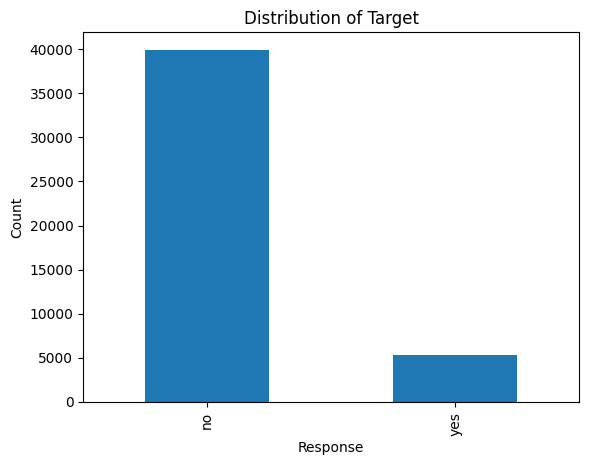

In [7]:
# Bar Chart of Marketing Response
df['y'].value_counts().plot(kind='bar')
plt.title('Distribution of Target')
plt.xlabel('Response')
plt.ylabel('Count')

## Numerical Feature Analysis

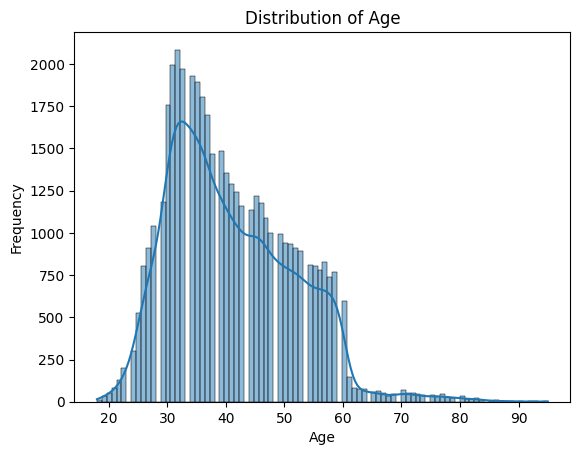

In [8]:
# Distribution of Age

sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

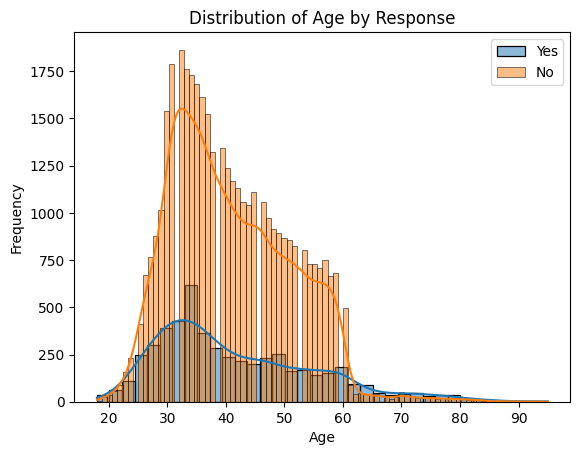

In [9]:
# Distribution of Age by Response
sns.histplot(data=df[df['y'] == 'yes'], x='age', kde=True, label='Yes')
sns.histplot(data=df[df['y'] == 'no'], x='age', kde=True, label='No')
plt.legend()
plt.title('Distribution of Age by Response')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [10]:
num_cols = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

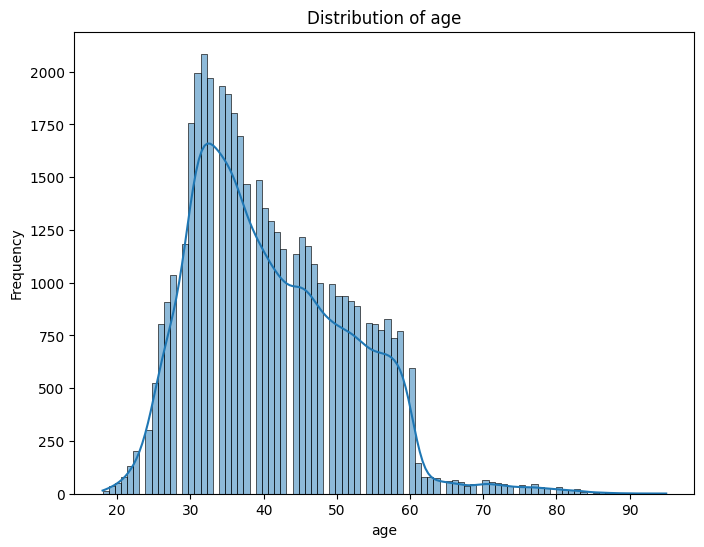

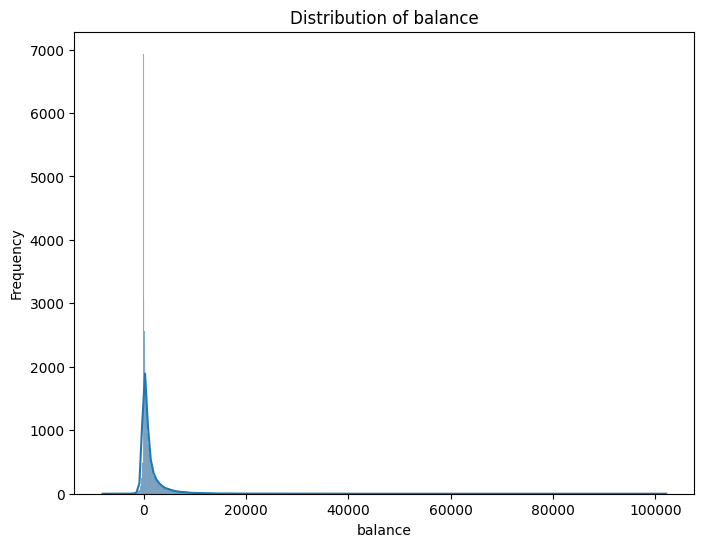

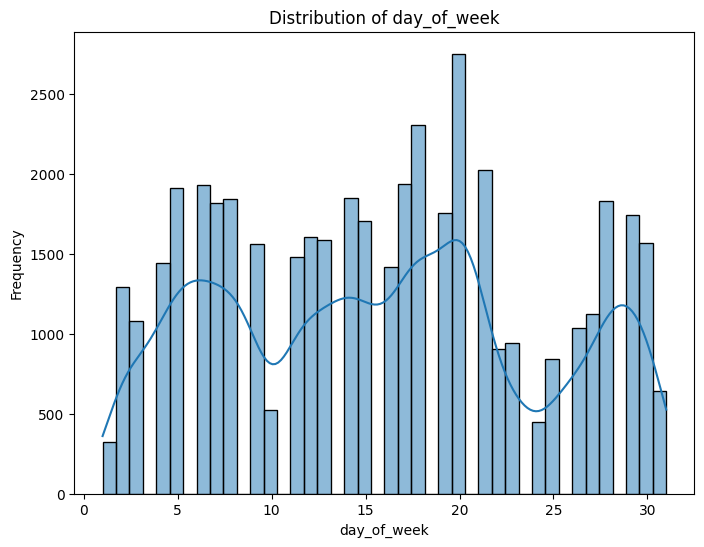

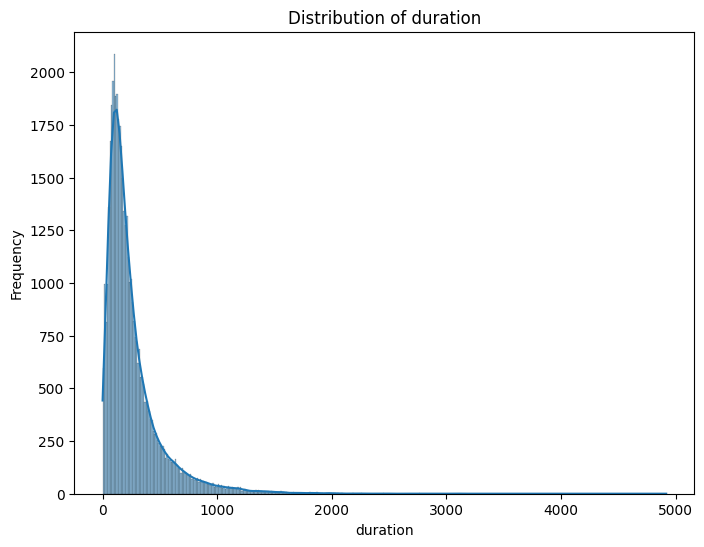

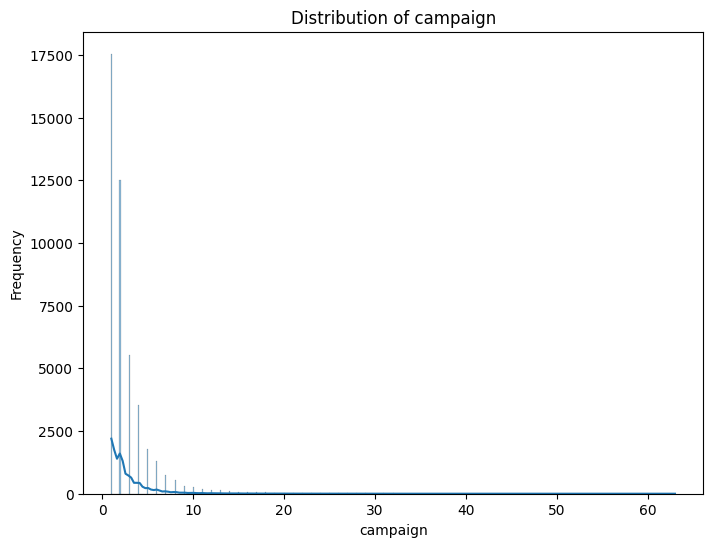

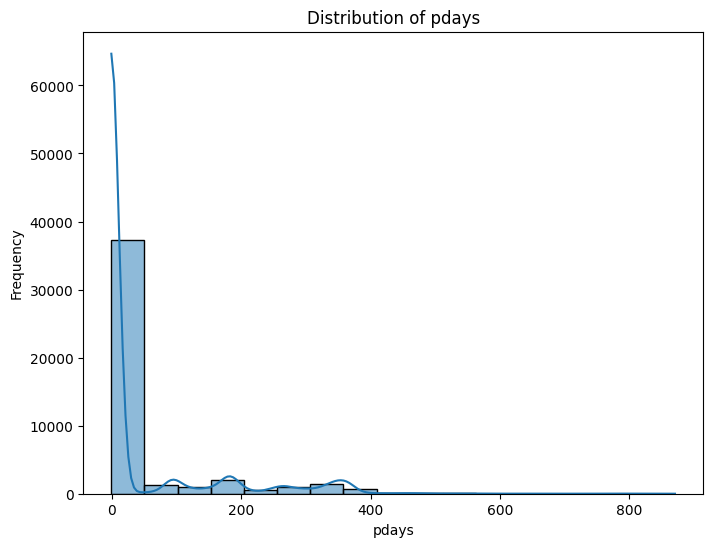

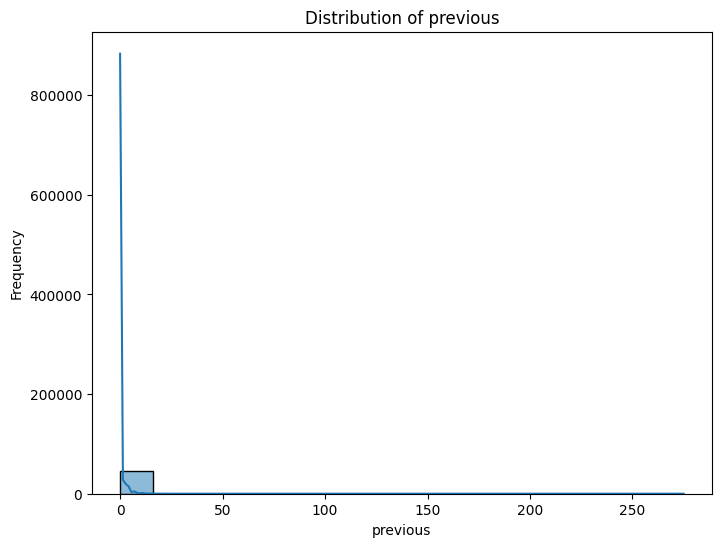

In [11]:
# Distribution of Each Numerical Feature
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Categorical Feature Analysis

In [12]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

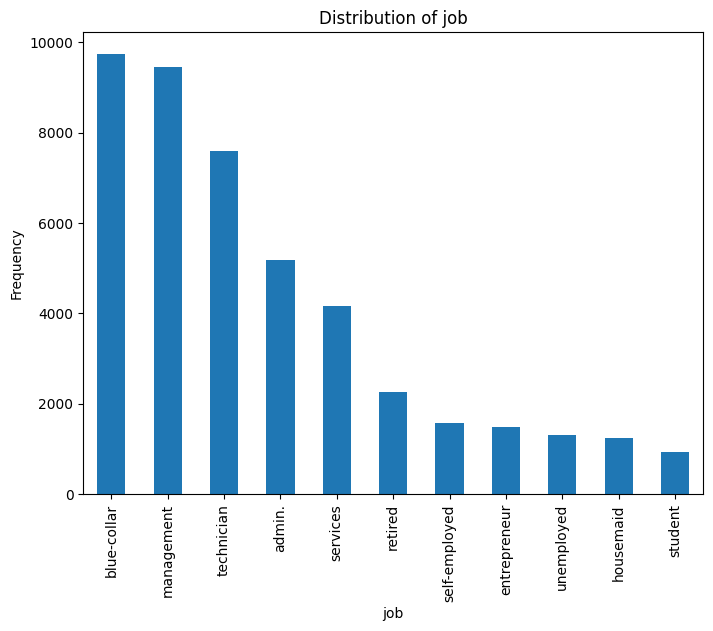

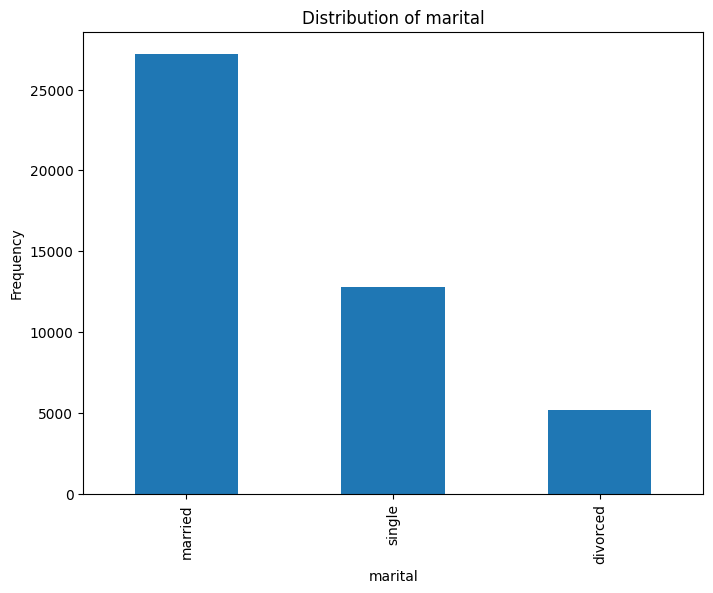

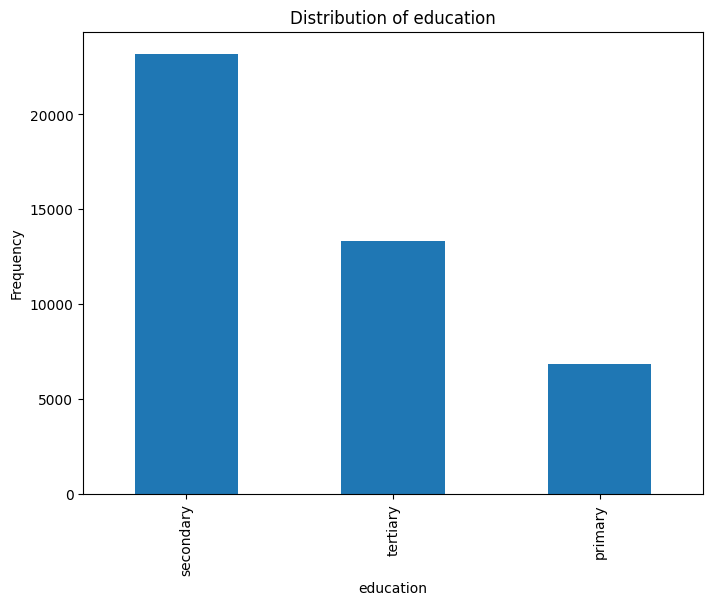

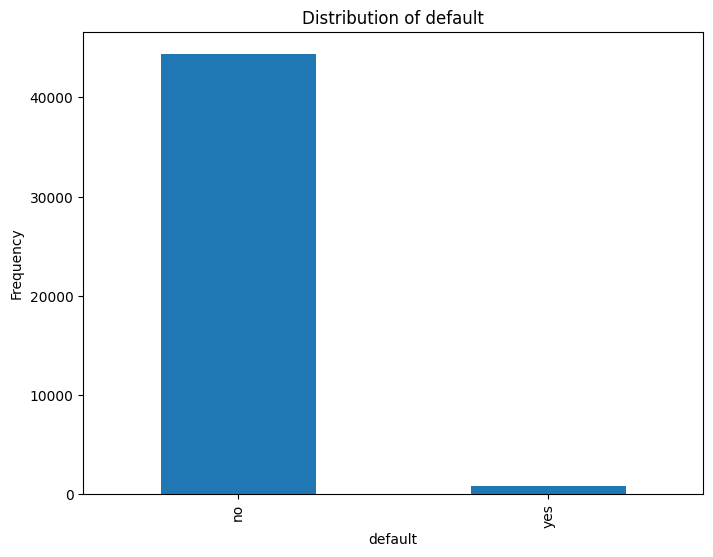

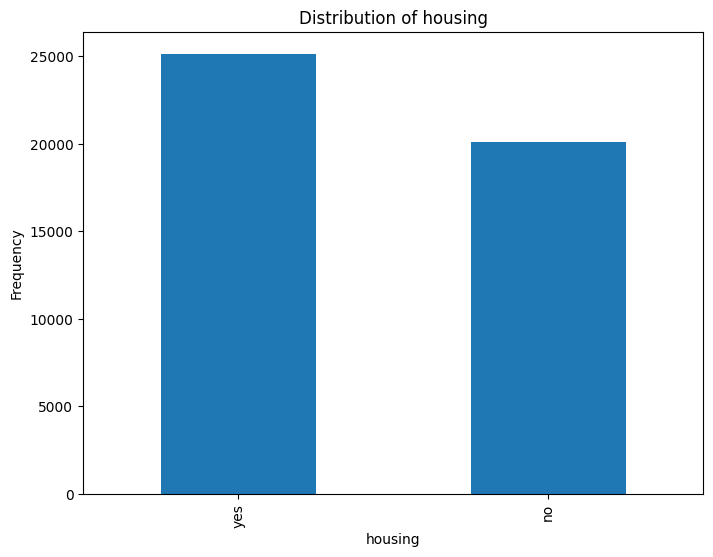

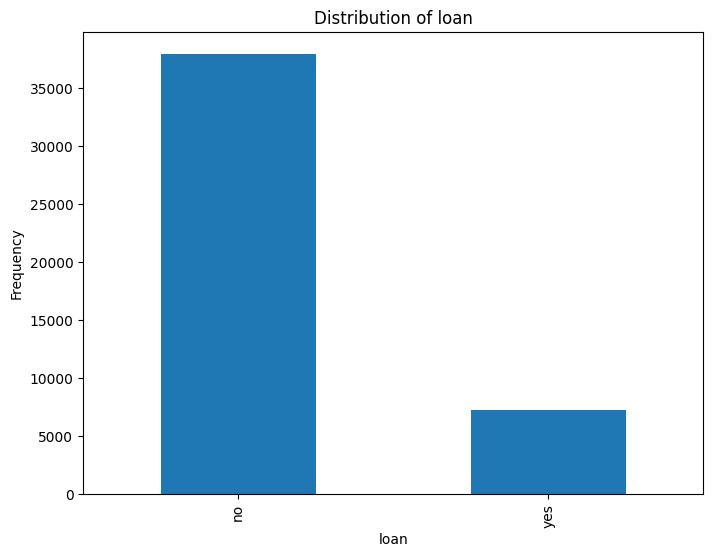

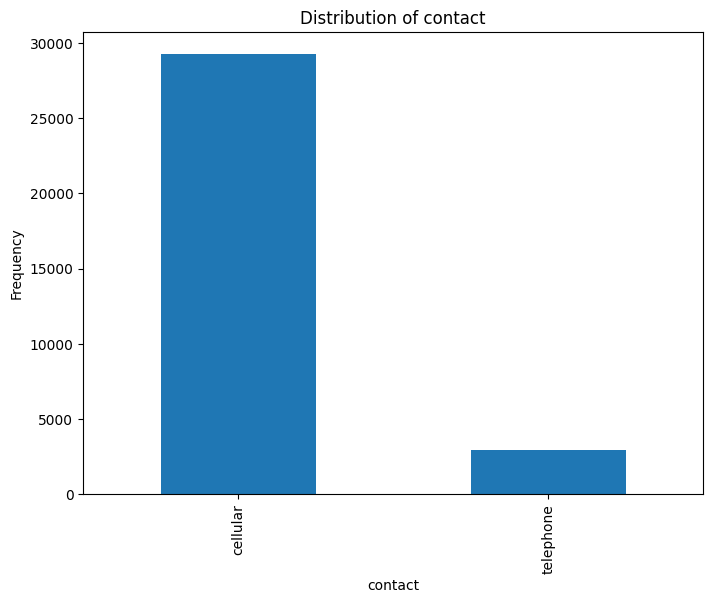

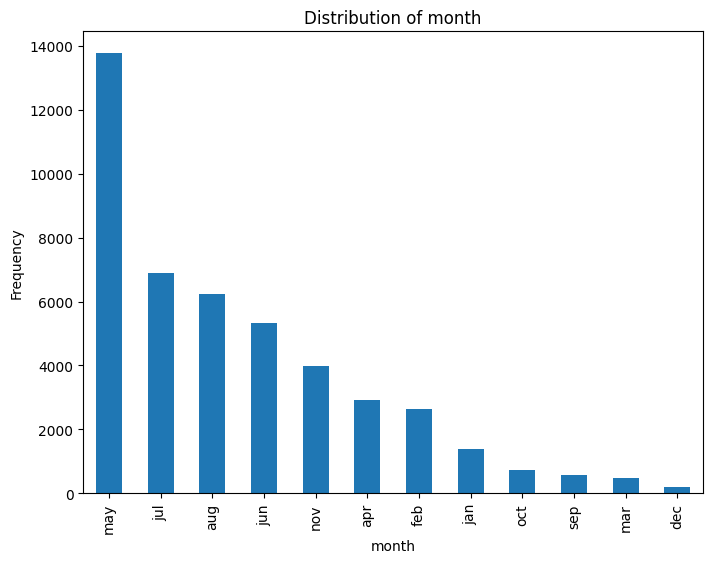

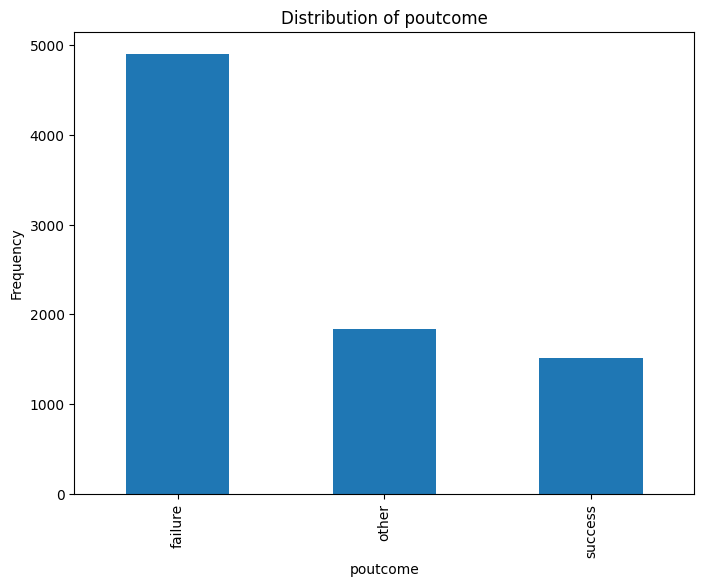

In [13]:
# Distribution of Categorical Values
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

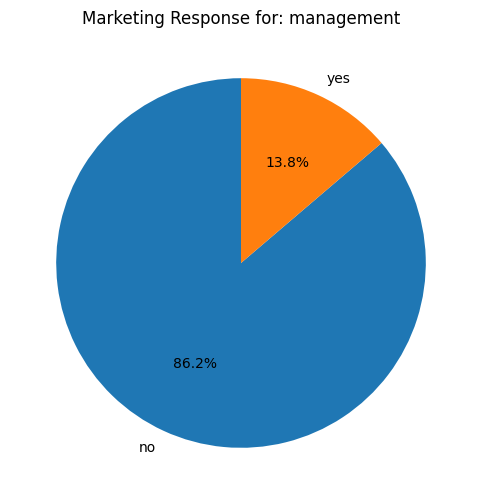

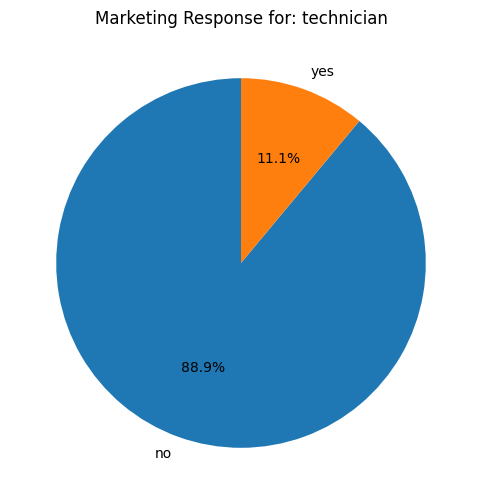

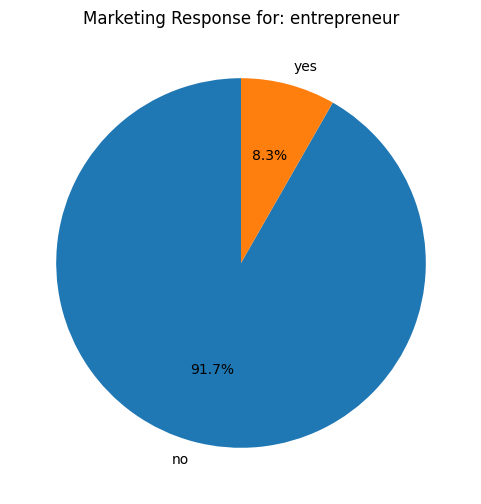

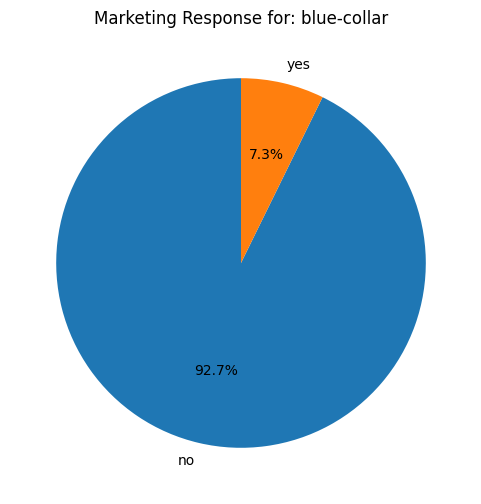

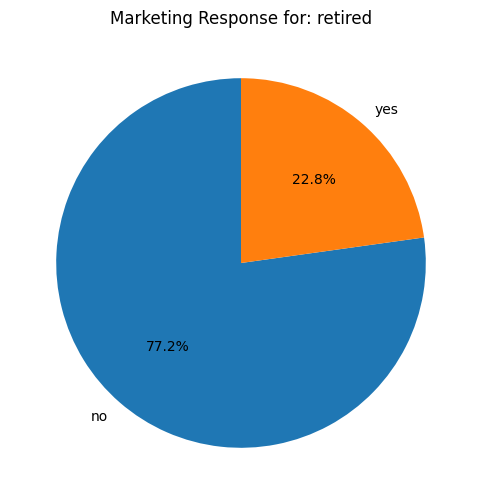

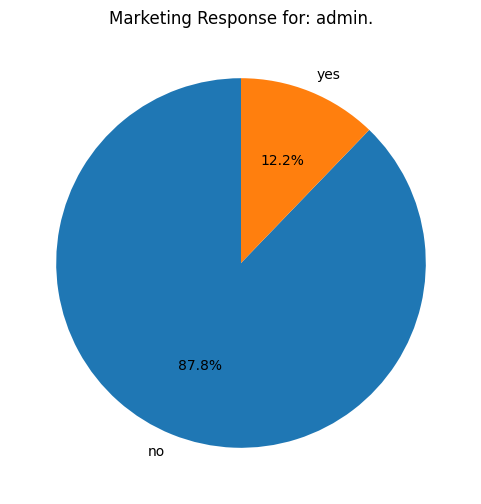

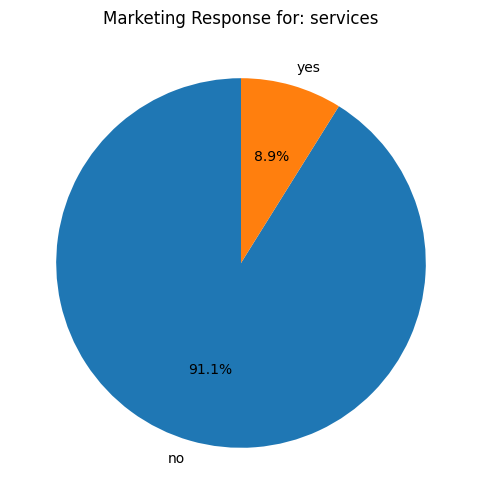

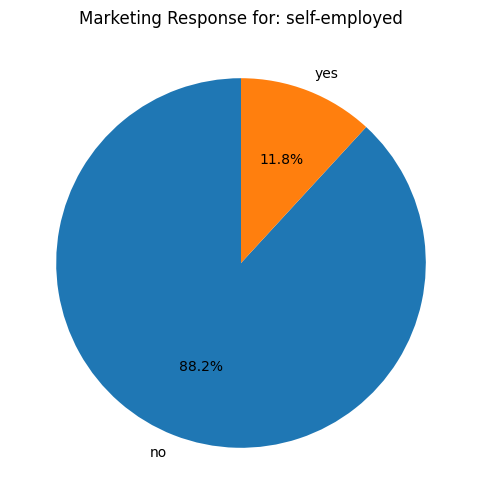

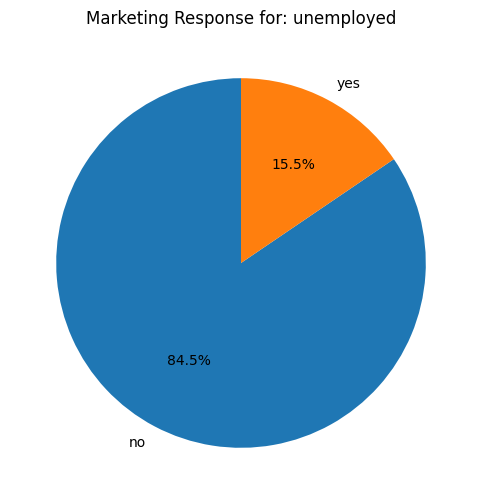

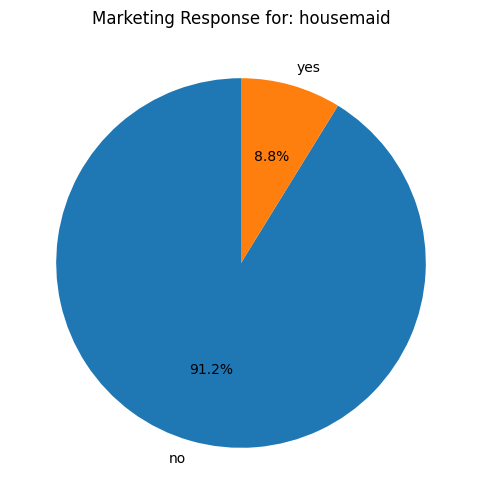

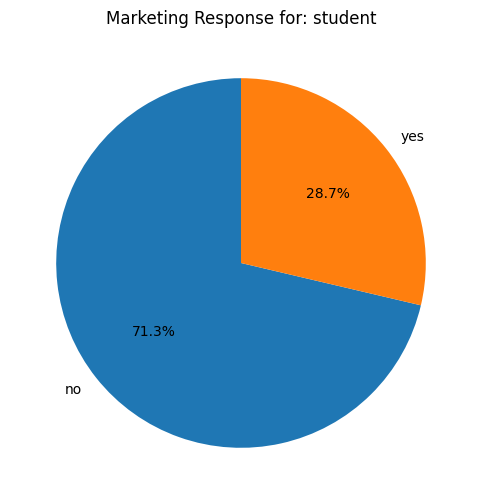

In [14]:
## Pie Charts of Response by Job Title

# Get unique job titles
job_titles = df['job'].unique()

# Iterate through each job title and create a pie chart
for job in job_titles:
    # Filter the DataFrame for the current job title
    job_df = df[df['job'] == job]

    # Get the value counts for 'y' (response) for the current job
    response_counts = job_df['y'].value_counts()

    # Check if there are any responses for this job title
    if not response_counts.empty:
        # Create the pie chart
        plt.figure(figsize=(6, 6)) # Adjust figure size as needed
        response_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f'Marketing Response for: {job}')
        plt.ylabel('') # Remove the default y-label for a cleaner look
        plt.show()

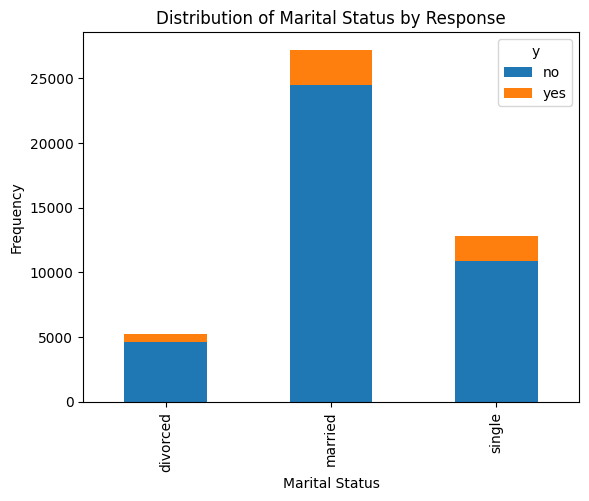

In [15]:
# Yes/No Matrix for Marital and Response
marital_response = pd.crosstab(df['marital'], df['y'])
marital_response.plot(kind='bar', stacked=True)
plt.title('Distribution of Marital Status by Response')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

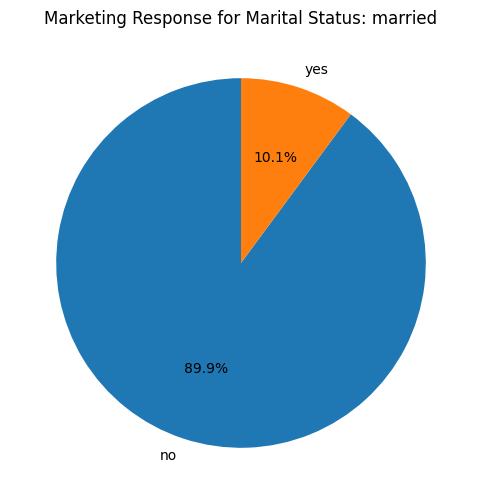

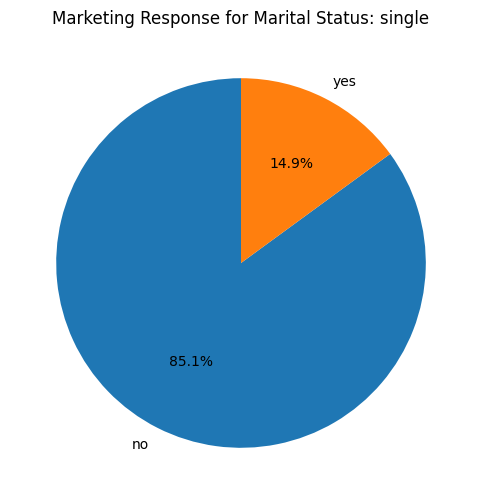

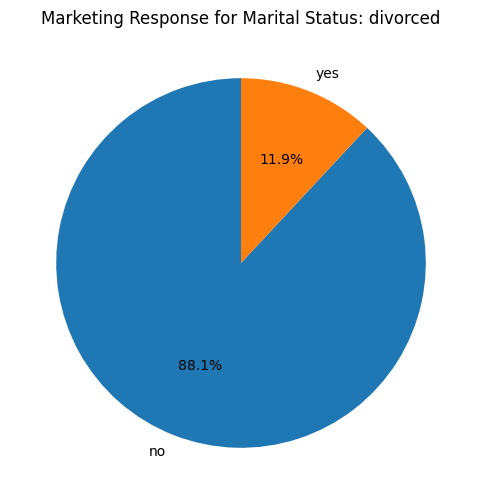

In [16]:
## Pie Charts of Response by Marital Status

# Get unique marital statuses
marital_statuses = df['marital'].unique()

# Iterate through each marital status and create a pie chart
for status in marital_statuses:
    # Filter the DataFrame for the current marital status
    marital_df = df[df['marital'] == status]

    # Get the value counts for 'y' (response) for the current status
    response_counts = marital_df['y'].value_counts()

    # Check if there are any responses for this marital status
    if not response_counts.empty:
        # Create the pie chart
        plt.figure(figsize=(6, 6)) # Adjust figure size as needed
        response_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f'Marketing Response for Marital Status: {status}')
        plt.ylabel('') # Remove the default y-label for a cleaner look
        plt.show()

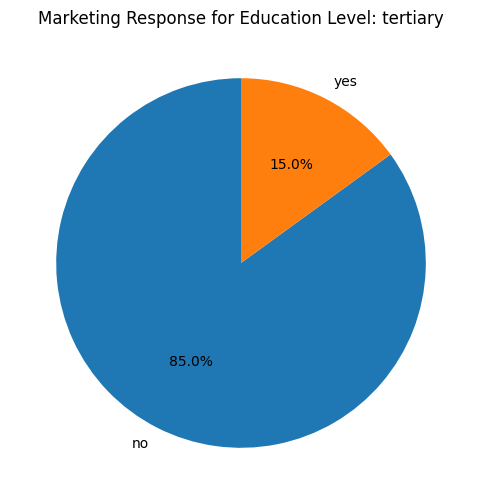

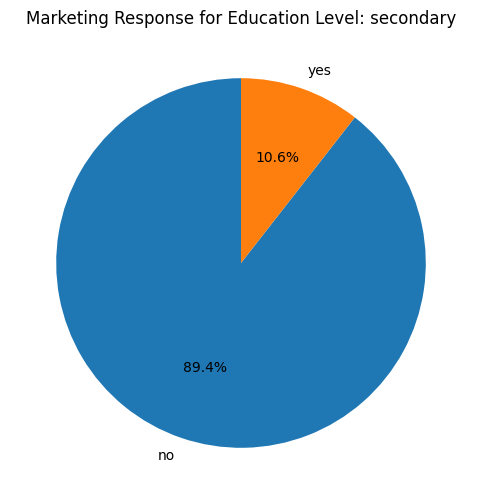

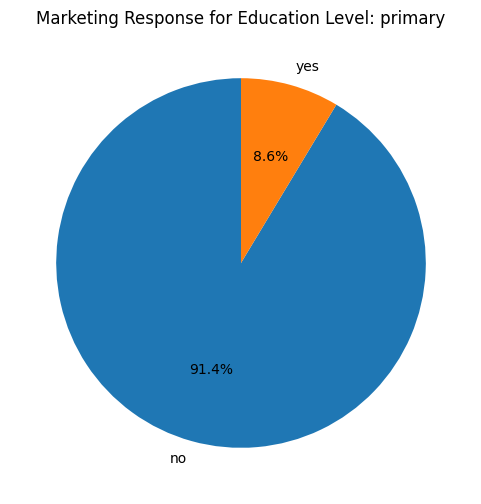

In [17]:
## Pie Charts of Response by Education Level

# Get unique education levels
education_levels = df['education'].unique()

# Iterate through each education level and create a pie chart
for level in education_levels:
    # Filter the DataFrame for the current education level
    education_df = df[df['education'] == level]

    # Get the value counts for 'y' (response) for the current level
    response_counts = education_df['y'].value_counts()

    # Check if there are any responses for this education level
    if not response_counts.empty:
        # Create the pie chart
        plt.figure(figsize=(6, 6)) # Adjust figure size as needed
        response_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f'Marketing Response for Education Level: {level}')
        plt.ylabel('') # Remove the default y-label for a cleaner look
        plt.show()

y           no   yes
default             
no       39159  5237
yes        763    52


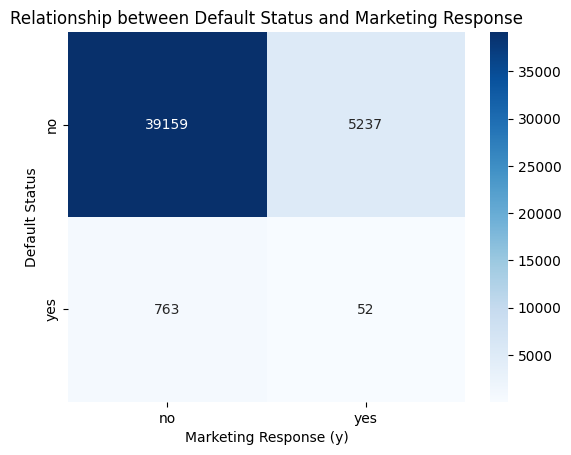

In [18]:
# Yes/No Matrix for Default and Response
default_response = pd.crosstab(df['default'], df['y'])
print(default_response)
sns.heatmap(default_response, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Default Status and Marketing Response')
plt.xlabel('Marketing Response (y)')
plt.ylabel('Default Status')
plt.show()

y           no   yes
housing             
no       16727  3354
yes      23195  1935


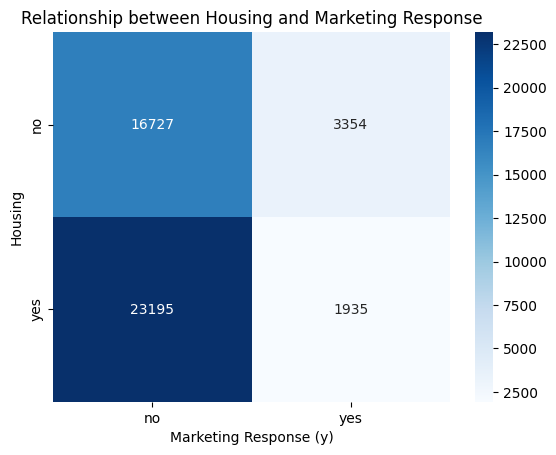

In [19]:
# Yes/No Matrix for Housing and Response
housing = pd.crosstab(df['housing'], df['y'])
print(housing)
sns.heatmap(housing, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Housing and Marketing Response')
plt.xlabel('Marketing Response (y)')
plt.ylabel('Housing')
plt.show()

y        no   yes
loan             
no    33162  4805
yes    6760   484


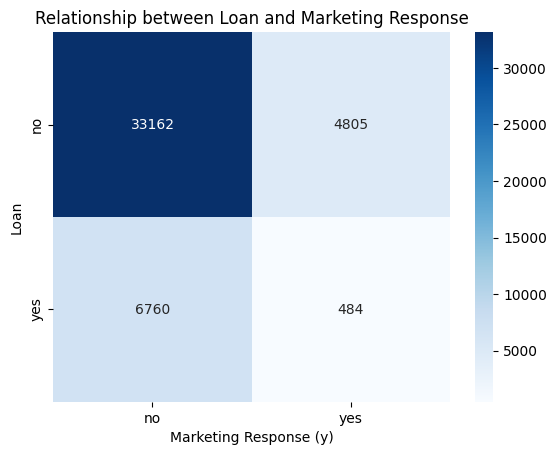

In [20]:
# Yes/No Matrix for Loan and Response
loan_status = pd.crosstab(df['loan'], df['y'])
print(loan_status)
sns.heatmap(loan_status, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Loan and Marketing Response')
plt.xlabel('Marketing Response (y)')
plt.ylabel('Loan')
plt.show()

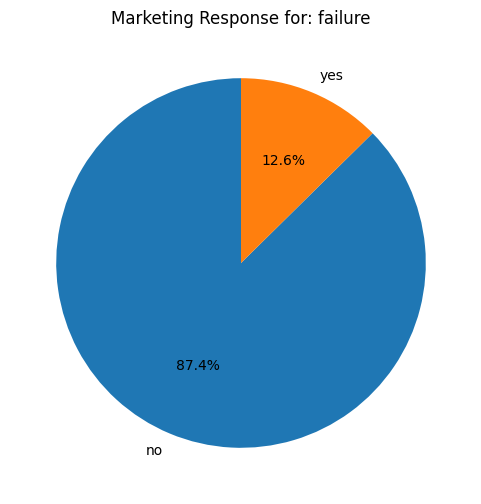

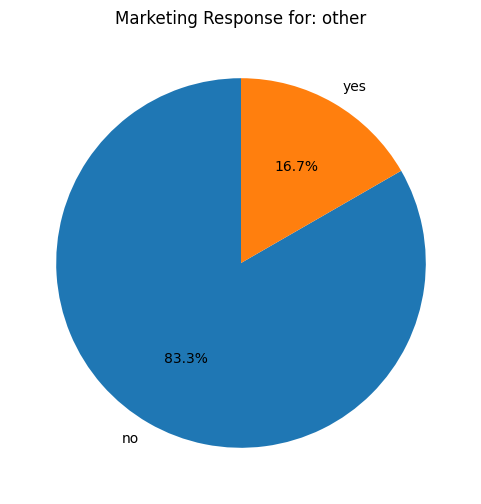

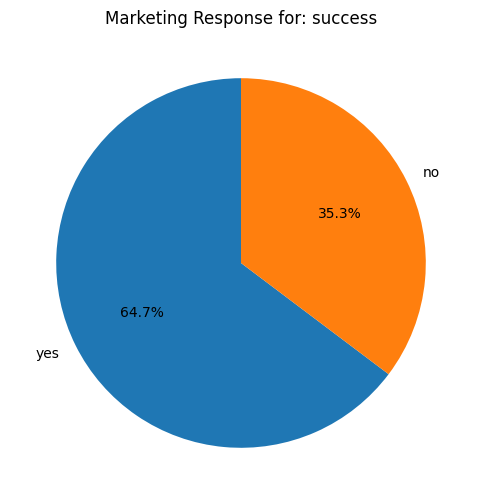

In [21]:
## Pie Charts of Response by Previous Attempt

# Get unique job titles
poutcomes = df['poutcome'].unique()

# Iterate through each job title and create a pie chart
for outcome in poutcomes:
    # Filter the DataFrame for the previous attempt outcome
    poutcomes_df = df[df['poutcome'] == outcome]

    # Get the value counts for 'y' (response) for the previous attempt outcome
    response_counts = poutcomes_df['y'].value_counts()

    # Check if there are any responses for this attempt outcome
    if not response_counts.empty:
        # Create the pie chart
        plt.figure(figsize=(6, 6)) # Adjust figure size as needed
        response_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f'Marketing Response for: {outcome}')
        plt.ylabel('') # Remove the default y-label for a cleaner look
        plt.show()

# Feature Engineering

**Target Feature**
- The target column has class imbalance issue
> SMOTE to handle

**All Features**
- Simple Imputer

**Numerical Features**

- Except `age`, all of other numerical features are right-skewed
> Log Transformation for these columns (`balance`,  `duration`, `campaign`, `pdays`, `previous`)
> Normalization for `age`
- Binning Encoding for `day_of_week`

**Categorical Features**
- Binary Encoding for `housing`, `loan`, `default` (yes = 1 and 0 otherwise)
- Binary Encoding for `marital` (married = 1 and 0 otherwise)
- Binary Encoding for `contact` (cellular = 1 and 0 otherwise)
- Binary Encoding for `poutcomes` (yes = 1 and 0 otherwise)
- Ordinal Encoding for `education` (primary = 0, secondary = 1, tertiary = 2)
- Target Encoding for `job`, `poutcomes`

**New Feature**
- `quarter` feature from `month` columns

In [22]:

from sklearn.impute import SimpleImputer

# Create SimpleImputer instances
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numerical columns
if len(num_cols) > 0:
  df[num_cols] = numerical_imputer.fit_transform(df[num_cols])

# Apply imputation to categorical columns
if len(cat_cols) > 0:
  df[cat_cols] = categorical_imputer.fit_transform(df[cat_cols])

# Display the info to check for remaining missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          45211 non-null  float64
 1   job          45211 non-null  object 
 2   marital      45211 non-null  object 
 3   education    45211 non-null  object 
 4   default      45211 non-null  object 
 5   balance      45211 non-null  float64
 6   housing      45211 non-null  object 
 7   loan         45211 non-null  object 
 8   contact      45211 non-null  object 
 9   day_of_week  45211 non-null  float64
 10  month        45211 non-null  object 
 11  duration     45211 non-null  float64
 12  campaign     45211 non-null  float64
 13  pdays        45211 non-null  float64
 14  previous     45211 non-null  float64
 15  poutcome     45211 non-null  object 
 16  y            45211 non-null  object 
dtypes: float64(7), object(10)
memory usage: 5.9+ MB


In [23]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

# Log Transformation for skewed numerical features
skewed_cols = ['duration', 'campaign', 'previous']
for col in skewed_cols:
    df[col] = np.log1p(df[col])

# Handling -1 in pdays
df['pdays'] = df['pdays'].replace(-1, np.nan)
df['pdays'] = np.log1p(df['pdays'])
pdays_imputer = SimpleImputer(strategy='median')
df['pdays'] = pdays_imputer.fit_transform(df[['pdays']])

# Handling negative values in balance with shifting before log transformation
min_balance = df['balance'].min()
shift_constant = 1 - min_balance
df['balance'] = df['balance'] + shift_constant
df['balance'] = np.log1p(df['balance'])

# Normalization for 'age'
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])


In [24]:
# Binning Encoding for 'day_of_week'
bins = [0, 10, 20, 31]
labels = [0, 1, 3] # Labels for the bins
df['day_of_week_binned'] = pd.cut(df['day_of_week'], bins=bins, labels=labels, right=True, include_lowest=True)

# Convert the binned column to numeric if needed
df['day_of_week_binned'] = pd.to_numeric(df['day_of_week_binned'])

# Display the first few rows with the new binned feature
print(df[['day_of_week', 'day_of_week_binned']].head())
df = df.drop('day_of_week', axis=1)

   day_of_week  day_of_week_binned
0          5.0                   0
1          5.0                   0
2          5.0                   0
3          5.0                   0
4          5.0                   0


In [25]:
# Binary Encoding for specified categorical features
binary_cols = ['housing', 'loan', 'default', 'marital', 'contact', 'poutcome']
binary_mapping = {
    'yes': 1, 'no': 0,  # For housing, loan, default
    'married': 1, 'single': 0, 'divorced': 0, # For marital
    'cellular': 1, 'telephone': 0, 'unknown': 0, # For contact
    'success': 1, 'failure': 0, 'other': 0 # For poutcomes
}

for col in binary_cols:
    if col in ['housing', 'loan', 'default']:
        df[col + '_encoded'] = df[col].map({'yes': 1, 'no': 0})
    elif col == 'marital':
        df[col + '_encoded'] = df[col].map({'married': 1, 'single': 0, 'divorced': 0})
    elif col == 'contact':
        df[col + '_encoded'] = df[col].map({'cellular': 1, 'telephone': 0, 'unknown': 0})
    elif col == 'poutcome':
        df[col + '_encoded'] = df[col].map({'success': 1, 'failure': 0, 'other': 0})
    df = df.drop(col, axis=1) # Drop original column

# Ordinal Encoding for 'education'
education_order = ['unknown', 'primary', 'secondary', 'tertiary'] # Adjust order based on domain knowledge
education_mapping = {level: i for i, level in enumerate(education_order)}
df['education_encoded'] = df['education'].map(education_mapping)
df = df.drop('education', axis=1) # Drop original column

In [26]:
# Target Encoding for job
job_target_encoding = df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean()).to_dict()
df['job_encoded'] = df['job'].map(job_target_encoding)

# Target Encoding for job
job_target_encoding = df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean()).to_dict()
df['job_encoded'] = df['job'].map(job_target_encoding)

In [27]:
# New Feature: quarter from month
month_to_quarter = {
    'jan': 1, 'feb': 1, 'mar': 1,
    'apr': 2, 'may': 2, 'jun': 2,
    'jul': 3, 'aug': 3, 'sep': 3,
    'oct': 4, 'nov': 4, 'dec': 4
}
df['quarter'] = df['month'].map(month_to_quarter)

In [28]:
df.head()

,age,job,balance,month,duration,campaign,pdays,previous,y,day_of_week_binned,housing_encoded,loan_encoded,default_encoded,marital_encoded,contact_encoded,poutcome_encoded,education_encoded,job_encoded,quarter
0,1.606965,management,9.226607,may,5.568345,0.693147,5.273,0.0,no,0,1,0,0,1,1,0,3,0.137556,2
1,0.288529,technician,8.993427,may,5.023881,0.693147,5.273,0.0,no,0,1,0,0,0,1,0,2,0.110570,2
2,-0.747384,entrepreneur,8.990068,may,4.343805,0.693147,5.273,0.0,no,0,1,1,0,1,1,0,2,0.082717,2
3,0.571051,blue-collar,9.161885,may,4.532599,0.693147,5.273,0.0,no,0,1,0,0,1,1,0,2,0.074052,2
4,-0.747384,blue-collar,8.989943,may,5.293305,0.693147,5.273,0.0,no,0,0,0,0,0,1,0,2,0.074052,2


In [29]:
# Binary Coding y (Target) Column
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [30]:
df_final = df[['age', 'balance', 'duration', 'campaign', 'pdays','previous', 'day_of_week_binned', 'housing_encoded',
       'loan_encoded', 'default_encoded', 'marital_encoded', 'contact_encoded',
       'poutcome_encoded', 'education_encoded', 'job_encoded', 'quarter', 'y']]
df_final.head()

,age,balance,duration,campaign,pdays,previous,day_of_week_binned,housing_encoded,loan_encoded,default_encoded,marital_encoded,contact_encoded,poutcome_encoded,education_encoded,job_encoded,quarter,y
0,1.606965,9.226607,5.568345,0.693147,5.273,0.0,0,1,0,0,1,1,0,3,0.137556,2,0
1,0.288529,8.993427,5.023881,0.693147,5.273,0.0,0,1,0,0,0,1,0,2,0.110570,2,0
2,-0.747384,8.990068,4.343805,0.693147,5.273,0.0,0,1,1,0,1,1,0,2,0.082717,2,0
3,0.571051,9.161885,4.532599,0.693147,5.273,0.0,0,1,0,0,1,1,0,2,0.074052,2,0
4,-0.747384,8.989943,5.293305,0.693147,5.273,0.0,0,0,0,0,0,1,0,2,0.074052,2,0


# Principal Component Analysis

In [31]:
df_final.describe()

,age,balance,duration,campaign,pdays,previous,day_of_week_binned,housing_encoded,loan_encoded,default_encoded,marital_encoded,contact_encoded,poutcome_encoded,education_encoded,job_encoded,quarter,y
count,4.521100e+04,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,2.112250e-16,9.118780,5.171812,1.158564,5.266821,0.226365,1.275796,0.555838,0.160226,0.018027,0.601933,0.935724,0.033421,2.142664,0.116985,2.421048,0.116985
std,1.000011e+00,0.212325,0.921822,0.511758,0.308341,0.533111,1.177408,0.496878,0.366820,0.133049,0.489505,0.245247,0.179735,0.652218,0.043563,0.813551,0.321406
min,-2.159994e+00,0.693147,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.074052,1.000000,0.000000
25%,-7.473845e-01,8.998755,4.644391,0.693147,5.273000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.082717,2.000000,0.000000
50%,-1.823406e-01,9.044168,5.198497,1.098612,5.273000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.110570,2.000000,0.000000
75%,6.652252e-01,9.153664,5.768321,1.386294,5.273000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.137556,3.000000,0.000000
max,5.091402e+00,11.609580,8.500861,4.158883,6.770789,5.620401,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.286780,4.000000,1.000000


In [32]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X = df_final.drop('y', axis=1)
y = df_final['y']

principalComponents = pca.fit_transform(X)
df_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
df_pca.head(5)

,principal component 1,principal component 2,principal component 3
0,-1.400243,1.326364,0.372457
1,-1.362296,0.071716,-0.215579
2,-1.274327,-0.715458,-0.930465
3,-1.327490,0.534009,-0.694520
4,-1.329819,-0.804226,0.026905


# Customer Clustering
Perform customer segmentation and assign each customer_id with cluster_id in the `cluster`feature

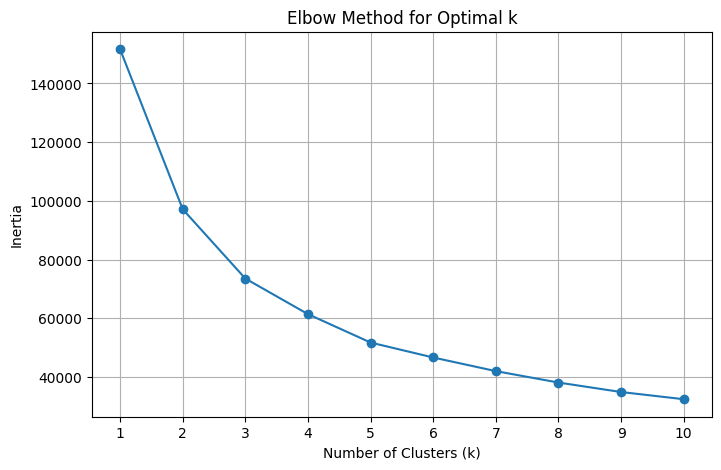

In [33]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters
# Using the Elbow Method
inertia = []
# Test a range of k values, e.g., from 1 to 10
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [35]:
optimal_k = 3

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(df_pca)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column to df_final
# Make sure the indices of df_final and cluster_labels align.
# Since df_pca was derived from df_final and preserves the row order,
# we can directly add the cluster_labels.
df_final_cluster = df_final.copy() # Create a copy to avoid modifying df_final in place
df_final_cluster['cluster'] = cluster_labels

# Display the first few rows of the new DataFrame with the cluster column
df_final_cluster.head()

,age,balance,duration,campaign,pdays,previous,day_of_week_binned,housing_encoded,loan_encoded,default_encoded,marital_encoded,contact_encoded,poutcome_encoded,education_encoded,job_encoded,quarter,y,cluster
0,1.606965,9.226607,5.568345,0.693147,5.273,0.0,0,1,0,0,1,1,0,3,0.137556,2,0,2
1,0.288529,8.993427,5.023881,0.693147,5.273,0.0,0,1,0,0,0,1,0,2,0.110570,2,0,0
2,-0.747384,8.990068,4.343805,0.693147,5.273,0.0,0,1,1,0,1,1,0,2,0.082717,2,0,0
3,0.571051,9.161885,4.532599,0.693147,5.273,0.0,0,1,0,0,1,1,0,2,0.074052,2,0,2
4,-0.747384,8.989943,5.293305,0.693147,5.273,0.0,0,0,0,0,0,1,0,2,0.074052,2,0,0


In [36]:
# # within each cluster or visualizing the clustered data in the PCA space.
# plt.figure(figsize=(10, 7))
# sns.scatterplot(x='principal component 1', y='principal component 2', hue='cluster', data=df_pca.assign(cluster=cluster_labels), palette='viridis', legend='full')
# plt.title('PCA with K-Means Clusters')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

# Mean values of features within each cluster
print("\nMean Feature Values per Cluster:")
df_final_cluster.groupby('cluster').mean()


Mean Feature Values per Cluster:


,age,balance,duration,campaign,pdays,previous,day_of_week_binned,housing_encoded,loan_encoded,default_encoded,marital_encoded,contact_encoded,poutcome_encoded,education_encoded,job_encoded,quarter,y
cluster,,,,,,,,,,,,,,,,,
0,-0.623941,9.105167,5.216694,1.103101,5.291257,0.273180,0.552002,0.654898,0.153490,0.017300,0.502112,0.963488,0.032388,2.221283,0.113306,2.290183,0.119292
1,-0.082829,9.111171,5.120767,1.270803,5.239955,0.151079,3.000000,0.508583,0.174296,0.021420,0.590396,0.928008,0.028689,2.200588,0.117667,2.509357,0.112125
2,1.087340,9.148555,5.153068,1.130434,5.255652,0.229811,0.637999,0.446228,0.156353,0.015651,0.774102,0.899234,0.040016,1.956111,0.122176,2.538846,0.118354


# Logistic Regression

In [51]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [52]:
# Logistic Classification
# Function to perform classification with K-Fold Cross-Validation

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def log_clf(df, target_column='y', test_size=0.3, random_state=42, n_splits=5):
    """
    Performs classification on the input DataFrame with K-Fold Cross-Validation
    on the training set and evaluates performance on the test set.

    Args:
        df (pd.DataFrame): The input DataFrame containing features and the target column.
        target_column (str): The name of the target column.
        test_size (float): The proportion of the dataset to include in the test split.
        random_state (int): Controls the shuffling applied to the data before applying the split.
        n_splits (int): Number of folds for K-Fold cross-validation.
    """
    print("--- Starting Classification and Evaluation Process ---")

    # Define features (X) and target (y)
    # Drop any non-numeric columns that might remain, although feature engineering
    # should have handled most of this. Ensure the target column is also excluded from features.
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # 1. Split dataset into train-test and handle class imbalance with SMOTE
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y # stratify to maintain target distribution
    )
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    print(f"Original dataset size: {len(df)}")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")
    print("Dataset split complete.")

    # 2. Within the train dataset, perform K-Fold Cross-Validation and report performance
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    fold_metrics = [] # List to store metrics for each fold

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_resampled, y_train_resampled)):
        print(f"\n--- Fold {fold + 1}/{n_splits} ---")
        X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
        y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

        print(f"Fold {fold + 1}: Training on {len(X_train_fold)} samples, Validating on {len(X_val_fold)} samples")

        # Initialize and train the classifier
        clf = LogisticRegression(random_state=random_state, max_iter=1000)
        print(f"Fold {fold + 1}: Training Logistic Regression model...")
        clf.fit(X_train_fold, y_train_fold)
        print(f"Fold {fold + 1}: Model training complete.")

        # Predict on the validation set
        y_pred_fold = clf.predict(X_val_fold)
        print(f"Fold {fold + 1}: Predictions made on validation set.")

        # Report performance on each fold
        print(f"Fold {fold + 1}: Performance Metrics")
        print(classification_report(y_val_fold, y_pred_fold))

        fold_metrics.append({
            'fold': fold + 1,
            'accuracy': accuracy_score(y_val_fold, y_pred_fold),
            'precision': precision_score(y_val_fold, y_pred_fold, average='weighted'), # Use weighted for multi-class if needed
            'recall': recall_score(y_val_fold, y_pred_fold, average='weighted'),
            'f1_score': f1_score(y_val_fold, y_pred_fold, average='weighted')
        })

    print("\n--- K-Fold Cross-Validation Complete ---")
    # Average metrics across folds
    if fold_metrics:
        avg_metrics = pd.DataFrame(fold_metrics).mean()
        print("\nAverage Metrics Across Folds:")
        print(avg_metrics[['accuracy', 'precision', 'recall', 'f1_score']].to_string()) # Use to_string to avoid truncation

    # 3. Perform model on the entire training dataset (X_train_resampled, y_train_resampled)
    final_clf = LogisticRegression(random_state=random_state, max_iter=1000) # Increased max_iter
    print("Training final Logistic Regression model...")
    final_clf.fit(X_train_resampled, y_train_resampled)
    print("Final model training complete.")

    # Predict on the test set
    y_pred_test = final_clf.predict(X_test)
    print("Predictions made on the test dataset.")

    # 4. Evaluate the performance on test data
    print("\n--- Test Set Performance Metrics ---")
    print(classification_report(y_test, y_pred_test))

    # Print individual scores
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1-score: {test_f1:.4f}")

    # Confusion Matrix
    print("\n--- Test Set Confusion Matrix ---")
    cm = confusion_matrix(y_test, y_pred_test)
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_clf.classes_, yticklabels=final_clf.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("\n--- Classification and Evaluation Process Complete ---")
    # Return the trained model and test set results if needed
    return final_clf, {
        'accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1_score': test_f1,
        'confusion_matrix': cm
    }

--- Starting Classification and Evaluation Process ---
Original dataset size: 45211
Training set size: 31647
Testing set size: 13564
Dataset split complete.

--- Fold 1/5 ---
Fold 1: Training on 44712 samples, Validating on 11178 samples
Fold 1: Training Logistic Regression model...
Fold 1: Model training complete.
Fold 1: Predictions made on validation set.
Fold 1: Performance Metrics
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      5561
           1       0.81      0.84      0.82      5617

    accuracy                           0.82     11178
   macro avg       0.82      0.82      0.82     11178
weighted avg       0.82      0.82      0.82     11178


--- Fold 2/5 ---
Fold 2: Training on 44712 samples, Validating on 11178 samples
Fold 2: Training Logistic Regression model...
Fold 2: Model training complete.
Fold 2: Predictions made on validation set.
Fold 2: Performance Metrics
              precision    recall  f1-score   suppor

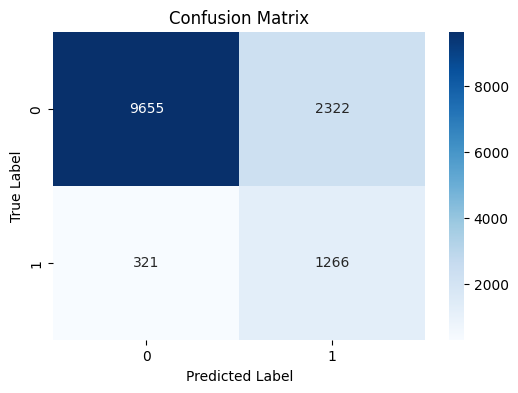


--- Classification and Evaluation Process Complete ---


In [53]:
model_final, scores_final = log_clf(df_final, target_column='y')

--- Starting Classification and Evaluation Process ---
Original dataset size: 45211
Training set size: 31647
Testing set size: 13564
Dataset split complete.

--- Fold 1/5 ---
Fold 1: Training on 44712 samples, Validating on 11178 samples
Fold 1: Training Logistic Regression model...
Fold 1: Model training complete.
Fold 1: Predictions made on validation set.
Fold 1: Performance Metrics
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      5561
           1       0.81      0.84      0.83      5617

    accuracy                           0.82     11178
   macro avg       0.82      0.82      0.82     11178
weighted avg       0.82      0.82      0.82     11178


--- Fold 2/5 ---
Fold 2: Training on 44712 samples, Validating on 11178 samples
Fold 2: Training Logistic Regression model...
Fold 2: Model training complete.
Fold 2: Predictions made on validation set.
Fold 2: Performance Metrics
              precision    recall  f1-score   suppor

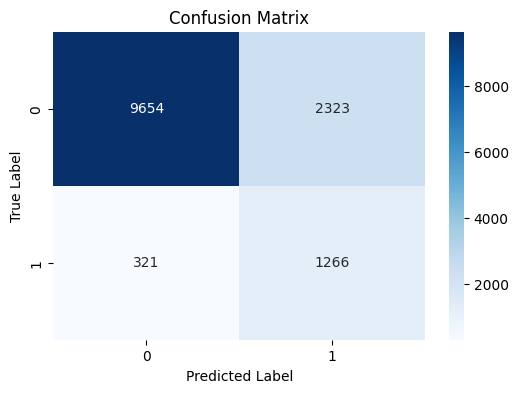


--- Classification and Evaluation Process Complete ---


In [54]:
model_final_cluster, scores_final_cluster = log_clf(df_final_cluster, target_column='y')

In [55]:
# Create DataFrames from the score dictionaries
df_scores_final = pd.DataFrame([scores_final])
df_scores_final_cluster = pd.DataFrame([scores_final_cluster])

# Exclude the confusion matrix from the DataFrame as it's an array
df_scores_final = df_scores_final.drop(columns=['confusion_matrix'])
df_scores_final_cluster = df_scores_final_cluster.drop(columns=['confusion_matrix'])

# You can add an identifier column to distinguish between the two results
df_scores_final['model'] = 'logistic_regression_v0'
df_scores_final_cluster['model'] = 'logistic_regression_cluster'

# Concatenate the two dataframes for easier comparison
df_all_scores = pd.concat([df_scores_final, df_scores_final_cluster], ignore_index=True)

print("\nCombined DataFrame of Scores:")
df_all_scores


Combined DataFrame of Scores:


,accuracy,precision,recall,f1_score,model
0,0.805146,0.895870,0.805146,0.833937,logistic_regression_v0
1,0.805072,0.895855,0.805072,0.833881,logistic_regression_cluster


# XGBoost

In [56]:
!pip install xgboost
from xgboost import XGBClassifier

In [57]:
def xgb_clf(df, target_column='y', test_size=0.3, random_state=42, n_splits=5):
    """
    Performs classification using XGBoost on the input DataFrame with K-Fold
    Cross-Validation on the training set and evaluates performance on the test set.

    Args:
        df (pd.DataFrame): The input DataFrame containing features and the target column.
        target_column (str): The name of the target column.
        test_size (float): The proportion of the dataset to include in the test split.
        random_state (int): Controls the shuffling applied to the data before applying the split.
        n_splits (int): Number of folds for K-Fold cross-validation.
    """
    print("--- Starting XGBoost Classification and Evaluation Process ---")

    # Define features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # 1. Split dataset into train-test and handle class imbalance with SMOTE
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y # stratify to maintain target distribution
    )
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("Class imbalance handled using SMOTE.")
    print(f"Original dataset size: {len(df)}")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")
    print("Dataset split complete.")

    # 2. Within the train dataset, perform K-Fold Cross-Validation and report performance
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    fold_metrics = [] # List to store metrics for each fold

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_resampled, y_train_resampled)):
        print(f"\n--- Fold {fold + 1}/{n_splits} ---")
        X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
        y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

        print(f"Fold {fold + 1}: Training on {len(X_train_fold)} samples, Validating on {len(X_val_fold)} samples")

        # Initialize and train the XGBoost classifier
        clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state)
        print(f"Fold {fold + 1}: Training XGBoost model...")
        clf.fit(X_train_fold, y_train_fold)
        print(f"Fold {fold + 1}: Model training complete.")

        # Predict on the validation set
        y_pred_fold = clf.predict(X_val_fold)
        print(f"Fold {fold + 1}: Predictions made on validation set.")

        # Report performance on each fold
        print(f"Fold {fold + 1}: Performance Metrics")
        print(classification_report(y_val_fold, y_pred_fold))

        fold_metrics.append({
            'fold': fold + 1,
            'accuracy': accuracy_score(y_val_fold, y_pred_fold),
            'precision': precision_score(y_val_fold, y_pred_fold, average='weighted'), # Use weighted for multi-class if needed
            'recall': recall_score(y_val_fold, y_pred_fold, average='weighted'),
            'f1_score': f1_score(y_val_fold, y_pred_fold, average='weighted')
        })

    print("\n--- K-Fold Cross-Validation Complete ---")
    # Average metrics across folds
    if fold_metrics:
        avg_metrics = pd.DataFrame(fold_metrics).mean()
        print("\nAverage Metrics Across Folds:")
        print(avg_metrics[['accuracy', 'precision', 'recall', 'f1_score']].to_string()) # Use to_string to avoid truncation

    # 3. Perform model on the entire training dataset (X_train, y_train)
    final_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state)
    print("Training final XGBoost model...")
    final_clf.fit(X_train_resampled, y_train_resampled)
    print("Final model training complete.")

    # Predict on the test set
    y_pred_test = final_clf.predict(X_test)
    print("Predictions made on the test dataset.")

    # 4. Evaluate the performance on test data
    print("\n--- Test Set Performance Metrics ---")
    print(classification_report(y_test, y_pred_test))

    # Print individual scores
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1-score: {test_f1:.4f}")

    # Confusion Matrix
    print("\n--- Test Set Confusion Matrix ---")
    cm = confusion_matrix(y_test, y_pred_test)
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_clf.classes_, yticklabels=final_clf.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("\n--- XGBoost Classification and Evaluation Process Complete ---")
    # Return the trained model and test set results if needed
    return final_clf, {
        'accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1_score': test_f1,
        'confusion_matrix': cm
    }

--- Starting XGBoost Classification and Evaluation Process ---
Class imbalance handled using SMOTE.
Original dataset size: 45211
Training set size: 31647
Testing set size: 13564
Dataset split complete.

--- Fold 1/5 ---
Fold 1: Training on 44712 samples, Validating on 11178 samples
Fold 1: Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:06:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1: Model training complete.
Fold 1: Predictions made on validation set.
Fold 1: Performance Metrics
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5561
           1       0.94      0.93      0.93      5617

    accuracy                           0.93     11178
   macro avg       0.93      0.93      0.93     11178
weighted avg       0.93      0.93      0.93     11178


--- Fold 2/5 ---
Fold 2: Training on 44712 samples, Validating on 11178 samples
Fold 2: Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:06:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2: Model training complete.
Fold 2: Predictions made on validation set.
Fold 2: Performance Metrics
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5640
           1       0.94      0.93      0.93      5538

    accuracy                           0.93     11178
   macro avg       0.93      0.93      0.93     11178
weighted avg       0.93      0.93      0.93     11178


--- Fold 3/5 ---
Fold 3: Training on 44712 samples, Validating on 11178 samples
Fold 3: Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3: Model training complete.
Fold 3: Predictions made on validation set.
Fold 3: Performance Metrics
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5521
           1       0.94      0.93      0.94      5657

    accuracy                           0.94     11178
   macro avg       0.94      0.94      0.94     11178
weighted avg       0.94      0.94      0.94     11178


--- Fold 4/5 ---
Fold 4: Training on 44712 samples, Validating on 11178 samples
Fold 4: Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:06:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4: Model training complete.
Fold 4: Predictions made on validation set.
Fold 4: Performance Metrics
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5588
           1       0.94      0.93      0.93      5590

    accuracy                           0.93     11178
   macro avg       0.93      0.93      0.93     11178
weighted avg       0.93      0.93      0.93     11178


--- Fold 5/5 ---
Fold 5: Training on 44712 samples, Validating on 11178 samples
Fold 5: Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:06:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5: Model training complete.
Fold 5: Predictions made on validation set.
Fold 5: Performance Metrics
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5635
           1       0.94      0.92      0.93      5543

    accuracy                           0.93     11178
   macro avg       0.93      0.93      0.93     11178
weighted avg       0.93      0.93      0.93     11178


--- K-Fold Cross-Validation Complete ---

Average Metrics Across Folds:
accuracy     0.934013
precision    0.934101
recall       0.934013
f1_score     0.934009
Training final XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final model training complete.
Predictions made on the test dataset.

--- Test Set Performance Metrics ---
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11977
           1       0.53      0.51      0.52      1587

    accuracy                           0.89     13564
   macro avg       0.73      0.72      0.73     13564
weighted avg       0.89      0.89      0.89     13564

Test Accuracy: 0.8907
Test Precision: 0.8881
Test Recall: 0.8907
Test F1-score: 0.8893

--- Test Set Confusion Matrix ---
[[11279   698]
 [  785   802]]


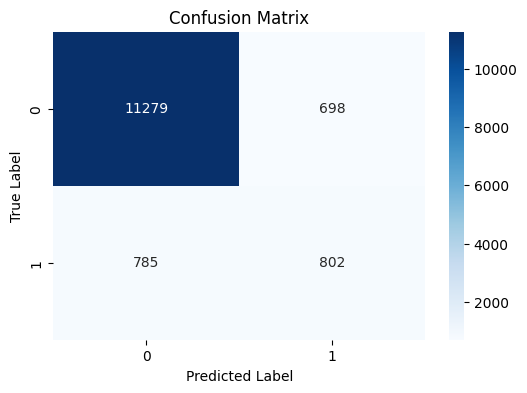


--- XGBoost Classification and Evaluation Process Complete ---


In [58]:
model_final, scores_final = xgb_clf(df_final, target_column='y')

--- Starting XGBoost Classification and Evaluation Process ---
Class imbalance handled using SMOTE.
Original dataset size: 45211
Training set size: 31647
Testing set size: 13564
Dataset split complete.

--- Fold 1/5 ---
Fold 1: Training on 44712 samples, Validating on 11178 samples
Fold 1: Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1: Model training complete.
Fold 1: Predictions made on validation set.
Fold 1: Performance Metrics
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5561
           1       0.94      0.93      0.93      5617

    accuracy                           0.93     11178
   macro avg       0.93      0.93      0.93     11178
weighted avg       0.93      0.93      0.93     11178


--- Fold 2/5 ---
Fold 2: Training on 44712 samples, Validating on 11178 samples
Fold 2: Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2: Model training complete.
Fold 2: Predictions made on validation set.
Fold 2: Performance Metrics
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5640
           1       0.94      0.93      0.94      5538

    accuracy                           0.94     11178
   macro avg       0.94      0.94      0.94     11178
weighted avg       0.94      0.94      0.94     11178


--- Fold 3/5 ---
Fold 3: Training on 44712 samples, Validating on 11178 samples
Fold 3: Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3: Model training complete.
Fold 3: Predictions made on validation set.
Fold 3: Performance Metrics
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5521
           1       0.94      0.93      0.94      5657

    accuracy                           0.94     11178
   macro avg       0.94      0.94      0.94     11178
weighted avg       0.94      0.94      0.94     11178


--- Fold 4/5 ---
Fold 4: Training on 44712 samples, Validating on 11178 samples
Fold 4: Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4: Model training complete.
Fold 4: Predictions made on validation set.
Fold 4: Performance Metrics
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5588
           1       0.94      0.93      0.94      5590

    accuracy                           0.94     11178
   macro avg       0.94      0.94      0.94     11178
weighted avg       0.94      0.94      0.94     11178


--- Fold 5/5 ---
Fold 5: Training on 44712 samples, Validating on 11178 samples
Fold 5: Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5: Model training complete.
Fold 5: Predictions made on validation set.
Fold 5: Performance Metrics
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5635
           1       0.94      0.93      0.93      5543

    accuracy                           0.93     11178
   macro avg       0.93      0.93      0.93     11178
weighted avg       0.93      0.93      0.93     11178


--- K-Fold Cross-Validation Complete ---

Average Metrics Across Folds:
accuracy     0.935981
precision    0.936052
recall       0.935981
f1_score     0.935979
Training final XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final model training complete.
Predictions made on the test dataset.

--- Test Set Performance Metrics ---
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11977
           1       0.54      0.50      0.52      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.72      0.73     13564
weighted avg       0.89      0.89      0.89     13564

Test Accuracy: 0.8920
Test Precision: 0.8888
Test Recall: 0.8920
Test F1-score: 0.8903

--- Test Set Confusion Matrix ---
[[11299   678]
 [  787   800]]


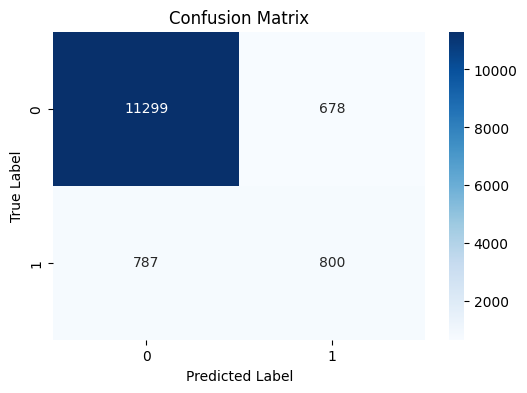


--- XGBoost Classification and Evaluation Process Complete ---


In [59]:
model_final_cluster, scores_final_cluster = xgb_clf(df_final_cluster, target_column='y')

In [60]:
# Create DataFrames from the score dictionaries
df_scores_final = pd.DataFrame([scores_final])
df_scores_final_cluster = pd.DataFrame([scores_final_cluster])

# Exclude the confusion matrix from the DataFrame as it's an array
df_scores_final = df_scores_final.drop(columns=['confusion_matrix'])
df_scores_final_cluster = df_scores_final_cluster.drop(columns=['confusion_matrix'])

# You can add an identifier column to distinguish between the two results
df_scores_final['model'] = 'xgb_v0'
df_scores_final_cluster['model'] = 'xgb_cluster'

# Concatenate the two dataframes for easier comparison
df_all_scores = pd.concat([df_all_scores, df_scores_final], ignore_index=True)
df_all_scores = pd.concat([df_all_scores, df_scores_final_cluster], ignore_index=True)

print("\nCombined DataFrame of Scores:")
df_all_scores


Combined DataFrame of Scores:


,accuracy,precision,recall,f1_score,model
0,0.805146,0.895870,0.805146,0.833937,logistic_regression_v0
1,0.805072,0.895855,0.805072,0.833881,logistic_regression_cluster
2,0.890666,0.888099,0.890666,0.889324,xgb_v0
3,0.891994,0.888830,0.891994,0.890318,xgb_cluster


# LightGBM

In [62]:
!pip install lightgbm
from lightgbm import LGBMClassifier

In [63]:
def lgbm_clf(df, target_column='y', test_size=0.3, random_state=42, n_splits=5):
    """
    Performs classification using LightGBM on the input DataFrame with K-Fold
    Cross-Validation on the training set and evaluates performance on the test set.

    Args:
        df (pd.DataFrame): The input DataFrame containing features and the target column.
        target_column (str): The name of the target column.
        test_size (float): The proportion of the dataset to include in the test split.
        random_state (int): Controls the shuffling applied to the data before applying the split.
        n_splits (int): Number of folds for K-Fold cross-validation.
    """
    print("--- Starting LightGBM Classification and Evaluation Process ---")

    # Define features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # 1. Split dataset into train-test and handle class imbalance with SMOTE
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y # stratify to maintain target distribution
    )
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("Class imbalance handled using SMOTE.")
    print(f"Original dataset size: {len(df)}")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")
    print("Dataset split complete.")

    # 2. Within the train dataset, perform K-Fold Cross-Validation and report performance
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    fold_metrics = [] # List to store metrics for each fold

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_resampled, y_train_resampled)):
        print(f"\n--- Fold {fold + 1}/{n_splits} ---")
        X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
        y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

        print(f"Fold {fold + 1}: Training on {len(X_train_fold)} samples, Validating on {len(X_val_fold)} samples")

        # Initialize and train the LightGBM classifier
        # Use objective='binary' for binary classification and metric='logloss'
        clf = LGBMClassifier(objective='binary', metric='logloss', random_state=random_state)
        print(f"Fold {fold + 1}: Training LightGBM model...")
        clf.fit(X_train_fold, y_train_fold)
        print(f"Fold {fold + 1}: Model training complete.")

        # Predict on the validation set
        y_pred_fold = clf.predict(X_val_fold)
        print(f"Fold {fold + 1}: Predictions made on validation set.")

        # Report performance on each fold
        print(f"Fold {fold + 1}: Performance Metrics")
        print(classification_report(y_val_fold, y_pred_fold))

        fold_metrics.append({
            'fold': fold + 1,
            'accuracy': accuracy_score(y_val_fold, y_pred_fold),
            'precision': precision_score(y_val_fold, y_pred_fold, average='weighted'), # Use weighted for multi-class if needed
            'recall': recall_score(y_val_fold, y_pred_fold, average='weighted'),
            'f1_score': f1_score(y_val_fold, y_pred_fold, average='weighted')
        })

    print("\n--- K-Fold Cross-Validation Complete ---")
    # Average metrics across folds
    if fold_metrics:
        avg_metrics = pd.DataFrame(fold_metrics).mean()
        print("\nAverage Metrics Across Folds:")
        print(avg_metrics[['accuracy', 'precision', 'recall', 'f1_score']].to_string()) # Use to_string to avoid truncation

    # 3. Perform model on the entire training dataset (X_train_resampled, y_train_resampled)
    final_clf = LGBMClassifier(objective='binary', metric='logloss', random_state=random_state)
    print("Training final LightGBM model...")
    final_clf.fit(X_train_resampled, y_train_resampled)
    print("Final model training complete.")

    # Predict on the test set
    y_pred_test = final_clf.predict(X_test)
    print("Predictions made on the test dataset.")

    # 4. Evaluate the performance on test data
    print("\n--- Test Set Performance Metrics ---")
    print(classification_report(y_test, y_pred_test))

    # Print individual scores
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1-score: {test_f1:.4f}")

    # Confusion Matrix
    print("\n--- Test Set Confusion Matrix ---")
    cm = confusion_matrix(y_test, y_pred_test)
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_clf.classes_, yticklabels=final_clf.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("\n--- LightGBM Classification and Evaluation Process Complete ---")
    # Return the trained model and test set results if needed
    return final_clf, {
        'accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1_score': test_f1,
        'confusion_matrix': cm
    }


--- Starting LightGBM Classification and Evaluation Process ---
Class imbalance handled using SMOTE.
Original dataset size: 45211
Training set size: 31647
Testing set size: 13564
Dataset split complete.

--- Fold 1/5 ---
Fold 1: Training on 44712 samples, Validating on 11178 samples
Fold 1: Training LightGBM model...
[LightGBM] [Info] Number of positive: 22328, number of negative: 22384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1809
[LightGBM] [Info] Number of data points in the train set: 44712, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499374 -> initscore=-0.002505
[LightGBM] [Info] Start training from score -0.002505
Fold 1: Model training complete.
Fold 1: Predictions made on validation set.
Fold 1: Performance Metrics
              precision    recall  f1-score   support

           0       0.93    

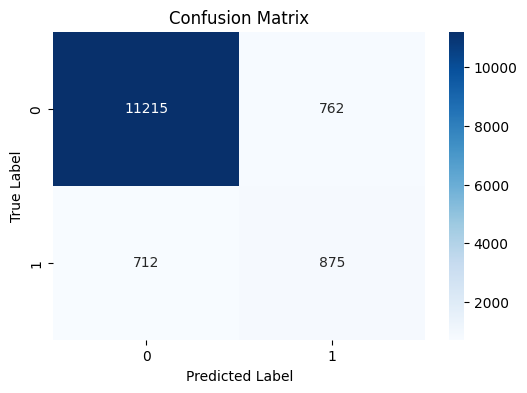


--- LightGBM Classification and Evaluation Process Complete ---


In [64]:
model_final, scores_final = lgbm_clf(df_final, target_column='y')

--- Starting LightGBM Classification and Evaluation Process ---
Class imbalance handled using SMOTE.
Original dataset size: 45211
Training set size: 31647
Testing set size: 13564
Dataset split complete.

--- Fold 1/5 ---
Fold 1: Training on 44712 samples, Validating on 11178 samples
Fold 1: Training LightGBM model...
[LightGBM] [Info] Number of positive: 22328, number of negative: 22384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1812
[LightGBM] [Info] Number of data points in the train set: 44712, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499374 -> initscore=-0.002505
[LightGBM] [Info] Start training from score -0.002505
Fold 1: Model training complete.
Fold 1: Predictions made on validation set.
Fold 1: Performance Metrics
              prec

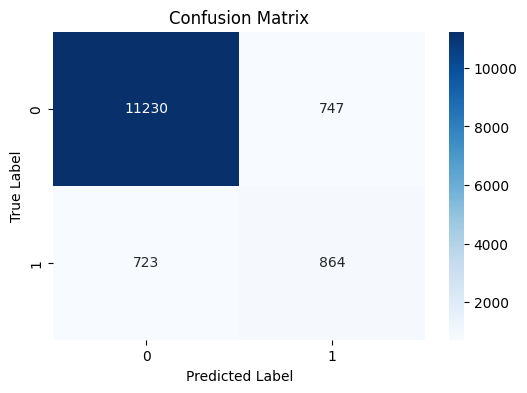


--- LightGBM Classification and Evaluation Process Complete ---


In [65]:
model_final_cluster, scores_final_cluster = lgbm_clf(df_final_cluster, target_column='y')

In [66]:
# Create DataFrames from the score dictionaries
df_scores_final = pd.DataFrame([scores_final])
df_scores_final_cluster = pd.DataFrame([scores_final_cluster])

# Exclude the confusion matrix from the DataFrame as it's an array
df_scores_final = df_scores_final.drop(columns=['confusion_matrix'])
df_scores_final_cluster = df_scores_final_cluster.drop(columns=['confusion_matrix'])

# You can add an identifier column to distinguish between the two results
df_scores_final['model'] = 'lgbm_v0'
df_scores_final_cluster['model'] = 'lgbm_cluster'

# Concatenate the two dataframes for easier comparison
df_all_scores = pd.concat([df_all_scores, df_scores_final], ignore_index=True)
df_all_scores = pd.concat([df_all_scores, df_scores_final_cluster], ignore_index=True)

print("\nCombined DataFrame of Scores:")
df_all_scores


Combined DataFrame of Scores:


,accuracy,precision,recall,f1_score,model
0,0.805146,0.895870,0.805146,0.833937,logistic_regression_v0
1,0.805072,0.895855,0.805072,0.833881,logistic_regression_cluster
2,0.890666,0.888099,0.890666,0.889324,xgb_v0
3,0.891994,0.888830,0.891994,0.890318,xgb_cluster
4,0.891330,0.892826,0.891330,0.892059,lgbm_v0
5,0.891625,0.892338,0.891625,0.891977,lgbm_cluster


# Results

In [ ]:
# Add a new column 'model_type' to distinguish between v0 and cluster models
df_all_scores['model_type'] = df_all_scores['model'].apply(lambda x: 'v0' if 'v0' in x else 'cluster')
# Add a new column 'model_name' to extract the model name (logistic, xgb, lgb)
df_all_scores['model_name'] = df_all_scores['model'].apply(lambda x: x.split('_')[0])

In [72]:
df_all_scores

,accuracy,precision,recall,f1_score,model,model_type,model_name
0,0.805146,0.895870,0.805146,0.833937,logistic_regression_v0,v0,logistic
1,0.805072,0.895855,0.805072,0.833881,logistic_regression_cluster,cluster,logistic
2,0.890666,0.888099,0.890666,0.889324,xgb_v0,v0,xgb
3,0.891994,0.888830,0.891994,0.890318,xgb_cluster,cluster,xgb
4,0.891330,0.892826,0.891330,0.892059,lgbm_v0,v0,lgbm
5,0.891625,0.892338,0.891625,0.891977,lgbm_cluster,cluster,lgbm


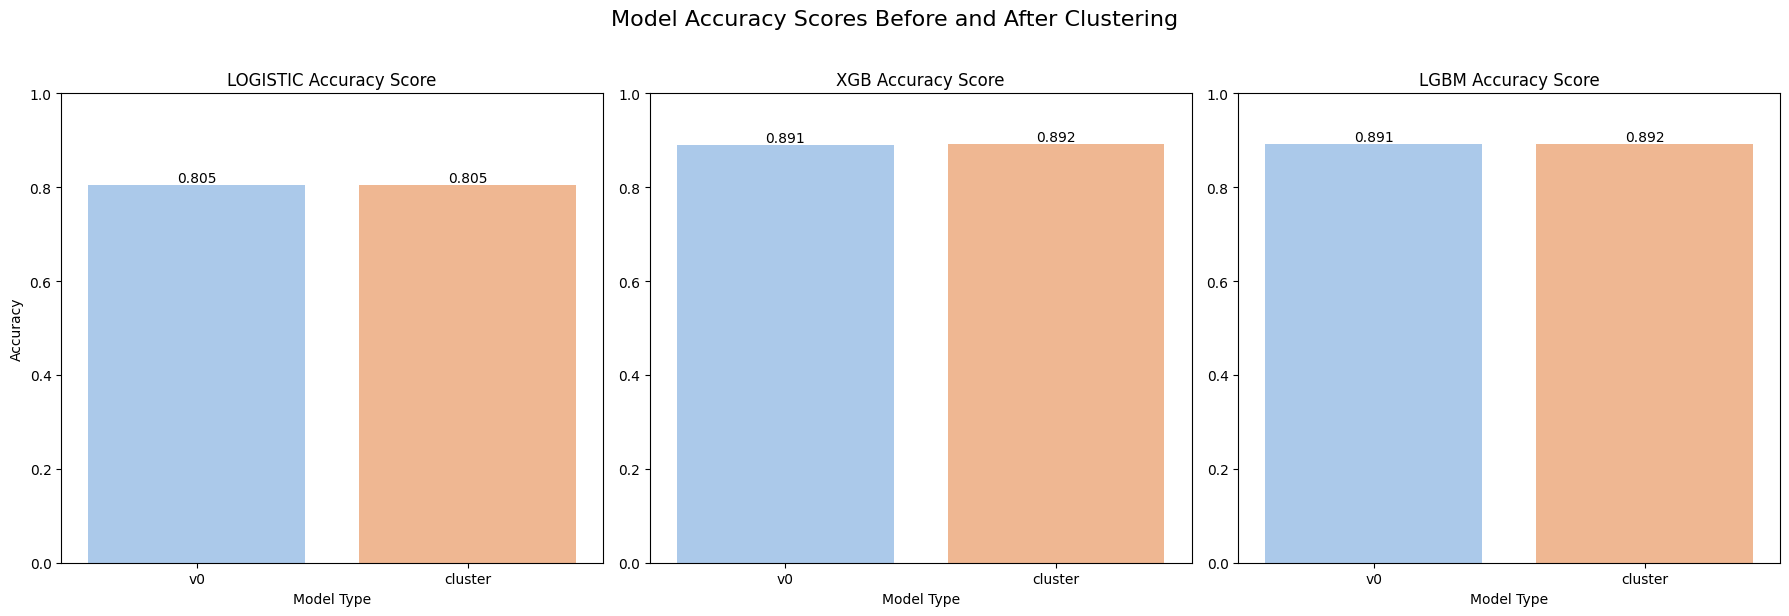

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define the order of models for plotting
model_order = ['logistic', 'xgb', 'lgbm']

# Iterate through each model and create a subplot
for i, model_name in enumerate(model_order):
    # Filter the DataFrame for the current model name
    model_data = df_all_scores[df_all_scores['model_name'] == model_name]

    # Create the barplot on the current subplot axis
    ax = sns.barplot(x='model_type', y='accuracy', hue='model_type', data=model_data, palette='pastel', ax=axes[i])

    if ax.containers:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', fontsize=10)

    # Set the title for the current subplot
    axes[i].set_title(f'{model_name.upper()} Accuracy Score')

    # Set the x-axis label
    axes[i].set_xlabel('Model Type')

    # Set the y-axis label (only for the first subplot for clarity)
    if i == 0:
        axes[i].set_ylabel('Accuracy')
    else:
        axes[i].set_ylabel('') # Remove y-label for other subplots
    # Set the y-axis limit
    ax.set_ylim(0, 1)

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x')

    # Check if a legend exists before trying to remove it
    if axes[i].legend_ is not None:
        axes[i].legend_.remove()


# Add a main title to the figure
fig.suptitle('Model Accuracy Scores Before and After Clustering', fontsize=16, y=1.02)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Show the plots
plt.show()

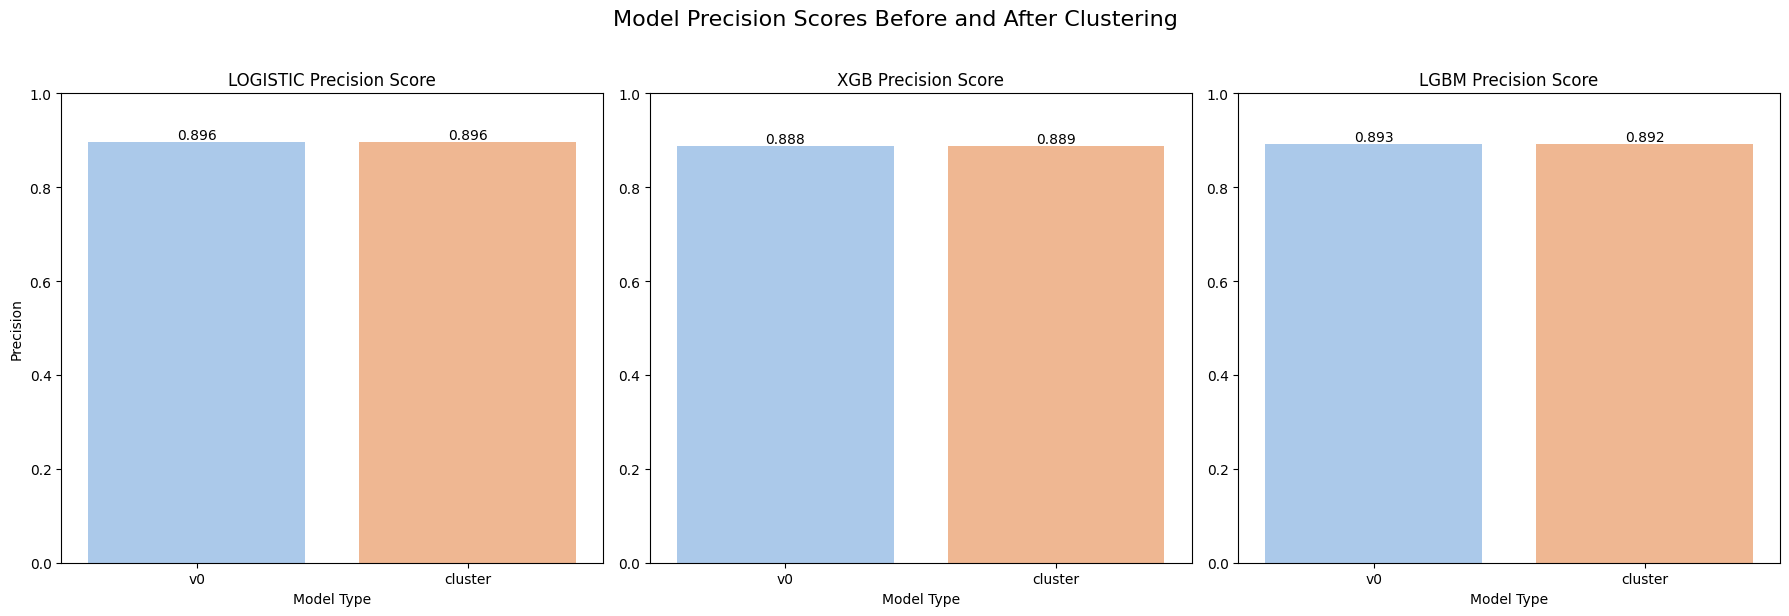

In [83]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define the order of models for plotting
model_order = ['logistic', 'xgb', 'lgbm']

# Iterate through each model and create a subplot for Precision
for i, model_name in enumerate(model_order):
    # Filter the DataFrame for the current model name
    model_data = df_all_scores[df_all_scores['model_name'] == model_name]

    # Create the barplot for Precision on the current subplot axis
    ax = sns.barplot(x='model_type', y='precision', hue='model_type', data=model_data, palette='pastel', ax=axes[i])

    if ax.containers:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', fontsize=10)

    # Set the title for the current subplot
    axes[i].set_title(f'{model_name.upper()} Precision Score')

    # Set the x-axis label
    axes[i].set_xlabel('Model Type')

    # Set the y-axis label (only for the first subplot for clarity)
    if i == 0:
        axes[i].set_ylabel('Precision')
    else:
        axes[i].set_ylabel('') # Remove y-label for other subplots

    # Set the y-axis limit
    ax.set_ylim(0, 1)

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x')

    # Check if a legend exists before trying to remove it
    if axes[i].legend_ is not None:
        axes[i].legend_.remove()


# Add a main title to the figure
fig.suptitle('Model Precision Scores Before and After Clustering', fontsize=16, y=1.02)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Show the plots
plt.show()



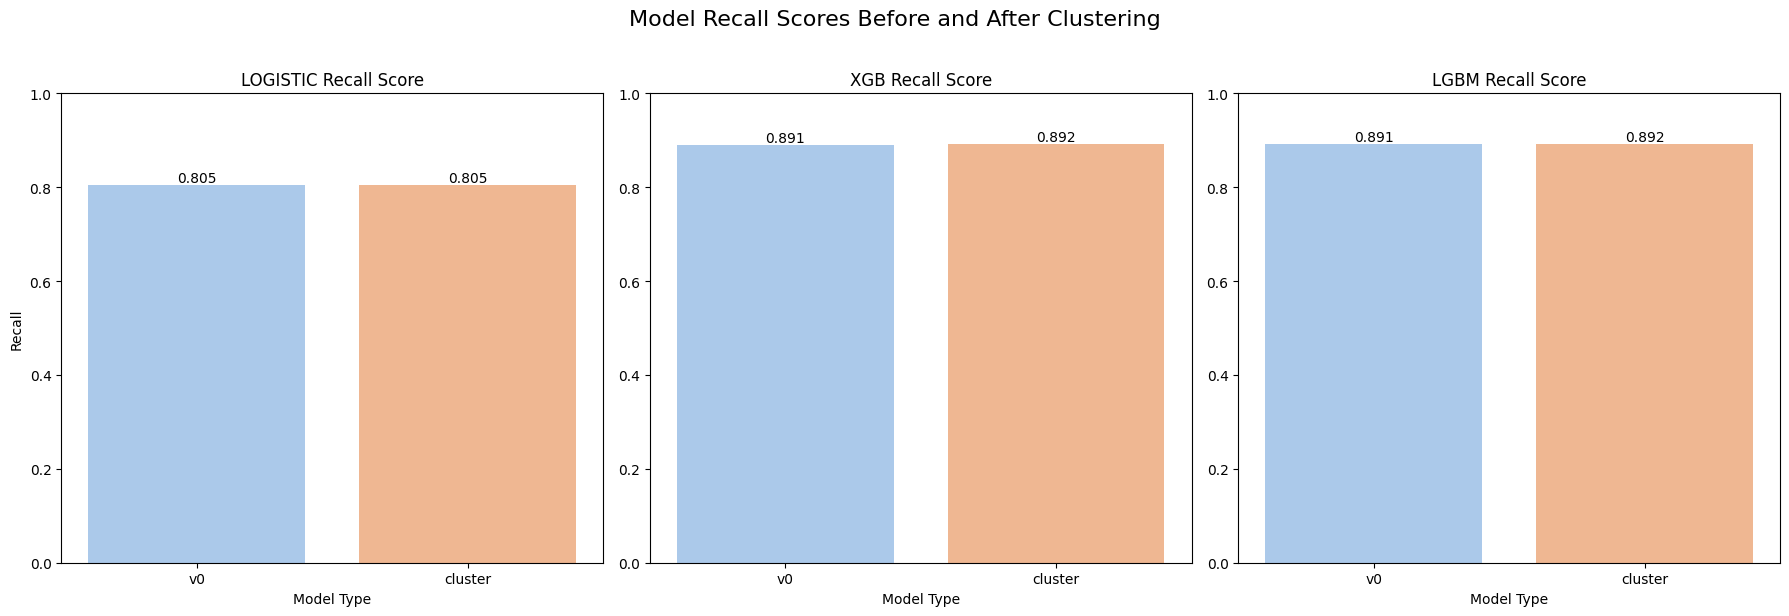

In [85]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define the order of models for plotting
model_order = ['logistic', 'xgb', 'lgbm']

# Iterate through each model and create a subplot for Recall
for i, model_name in enumerate(model_order):
    # Filter the DataFrame for the current model name
    model_data = df_all_scores[df_all_scores['model_name'] == model_name]

    # Create the barplot for Recall on the current subplot axis
    ax = sns.barplot(x='model_type', y='recall', hue='model_type', data=model_data, palette='pastel', ax=axes[i])

    if ax.containers:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', fontsize=10)

    # Set the title for the current subplot
    axes[i].set_title(f'{model_name.upper()} Recall Score')

    # Set the x-axis label
    axes[i].set_xlabel('Model Type')

    # Set the y-axis label (only for the first subplot for clarity)
    if i == 0:
        axes[i].set_ylabel('Recall')
    else:
        axes[i].set_ylabel('') # Remove y-label for other subplots

    # Set the y-axis limit
    ax.set_ylim(0, 1)

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x')

    # Check if a legend exists before trying to remove it
    if axes[i].legend_ is not None:
        axes[i].legend_.remove()


# Add a main title to the figure
fig.suptitle('Model Recall Scores Before and After Clustering', fontsize=16, y=1.02)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Show the plots
plt.show()


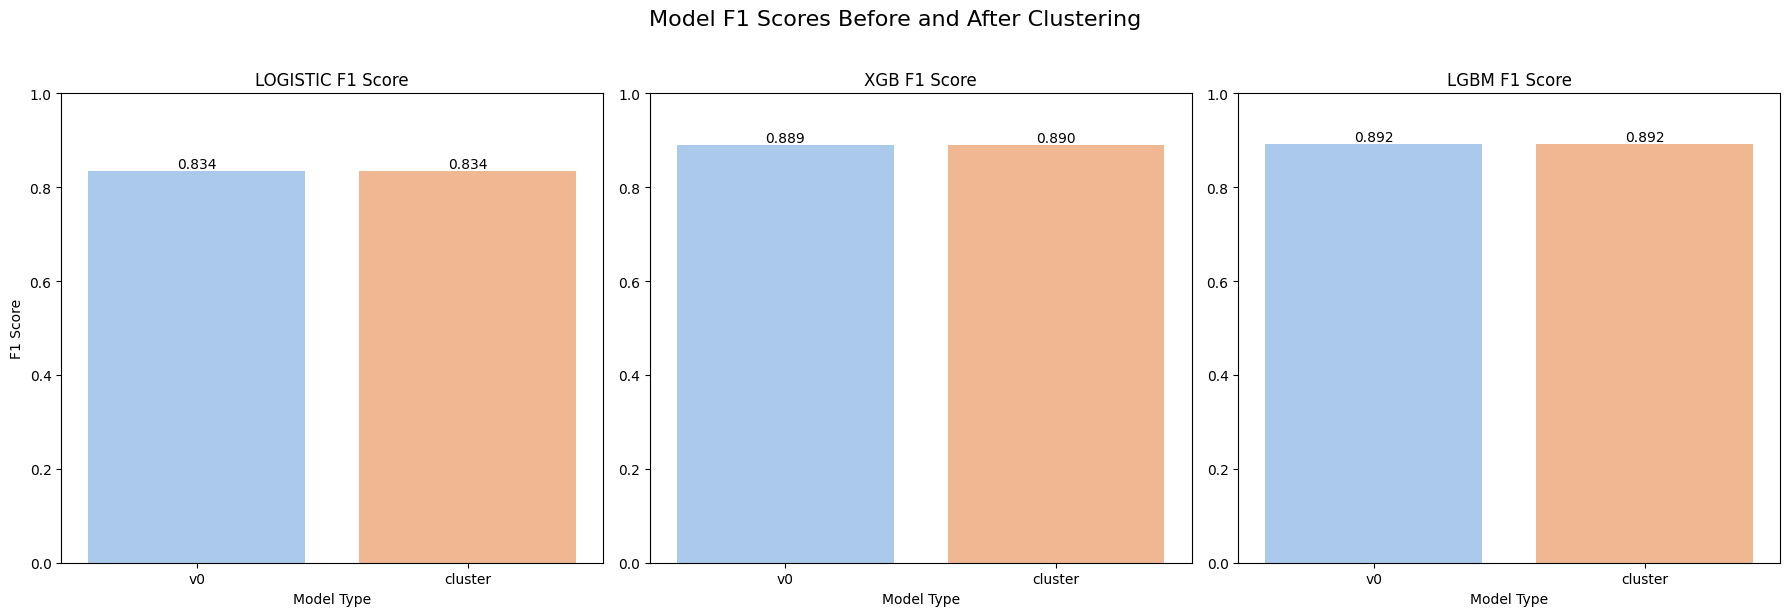

In [84]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define the order of models for plotting
model_order = ['logistic', 'xgb', 'lgbm']

# Iterate through each model and create a subplot for F1-score
for i, model_name in enumerate(model_order):
    # Filter the DataFrame for the current model name
    model_data = df_all_scores[df_all_scores['model_name'] == model_name]

    # Create the barplot for F1-score on the current subplot axis
    ax = sns.barplot(x='model_type', y='f1_score', hue='model_type', data=model_data, palette='pastel', ax=axes[i])

    if ax.containers:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', fontsize=10)

    # Set the title for the current subplot
    axes[i].set_title(f'{model_name.upper()} F1 Score')

    # Set the x-axis label
    axes[i].set_xlabel('Model Type')

    # Set the y-axis label (only for the first subplot for clarity)
    if i == 0:
        axes[i].set_ylabel('F1 Score')
    else:
        axes[i].set_ylabel('') # Remove y-label for other subplots

    # Set the y-axis limit
    ax.set_ylim(0, 1)

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x')

    # Check if a legend exists before trying to remove it
    if axes[i].legend_ is not None:
        axes[i].legend_.remove()


# Add a main title to the figure
fig.suptitle('Model F1 Scores Before and After Clustering', fontsize=16, y=1.02)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Show the plots
plt.show()